# Analyse Inforsid 2014 - 2023

Analyse des 10 dernières années de la conférence Inforsid. 
On été considérés uniquement les actes de la conférence principale (pas les actes des foruns ou ateliers). 

Pour chaque année, on s'est limité aux 15 mots et bigrams le plus fréquents. 

In [1]:
import pandas as pnd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

output_dir = './output_inforsid_50'
file_words_csv = './output_inforsid_50/Inforsidwordcount.csv'
file_ngrams_csv = './output_inforsid_50/Inforsidngramcount.csv'


## Analyse des mots les plus fréquents 

On commence par l'analyse des mots les plus fréquents, en partant des mots identifiés les proceedings.

In [2]:
wordcount = pnd.read_csv(file_words_csv, delimiter=';', header=[0])

wordcount.sample(10)

word  count                                           source  year
217  application    112  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018
60       concept    180  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015
7        langage    264  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
222  échantillon    105  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018
468    ontologie    100  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023
61     processus    168  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015
385     résultat     63  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021
333     activité     82  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf  2020
448       équipe     64  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022
237         open     84  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018

In [3]:
Aquartsup = int(wordcount.describe()['count'][-2])
Aquartinf = int(wordcount.describe()['count'][-4])
nmots = len(wordcount['word'].unique()) 

print ('Nb de mots uniques :', nmots)
print ('Frequence premier quart :', Aquartsup)
print ('Frequence dernier quart :', Aquartinf)

wordcount.describe()

Nb de mots uniques : 183
Frequence premier quart : 147
Frequence dernier quart : 83


count         year
count  500.000000   500.000000
mean   133.392000  2018.500000
std     85.784266     2.875158
min     53.000000  2014.000000
25%     83.000000  2016.000000
50%    112.000000  2018.500000
75%    147.000000  2021.000000
max    747.000000  2023.000000

Nous avons un total de 150 mots, dont 62 uniques, avec une fréquence moyenne de 212 par année. 

Le mot le plus fréquent est cité 747 fois, alors que le moins cité l'est 92 fois. 

Le dernier quartille (suppérieur) se trouve à 241 citations. 

In [4]:
wordcount.sort_values(by=['count', 'year'], ascending=False, inplace=True)
wordcount.head(15)

word  count                                           source  year
200       donnée    747  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018
0         modèle    675  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
1         donnée    624  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
150       donnée    593  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017
50   information    582  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015
250       donnée    515  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019
51   utilisateur    461  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015
300       donnée    458  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf  2020
151       modèle    448  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017
251  information    424  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019
2    information    419  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
152    processus    405  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017
400       donnée    388  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022
252       modèle    376  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019
153  information    358  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017

In [5]:
wordcount.tail(15)

word  count                                           source  \
499      transaction     62  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf   
386            tweet     61  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
387            étude     60  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
388              way     58  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
389            étape     57  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
390         question     57  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
391          tracing     56  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
392          travail     55  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
393     architecture     55  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
394      performance     55  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
395           partie     54  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
396          section     54  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
397        technique     54  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
398  partitionnement     54  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
399   l¶organisation     53  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   

     year  
499  2023  
386  2021  
387  2021  
388  2021  
389  2021  
390  2021  
391  2021  
392  2021  
393  2021  
394  2021  
395  2021  
396  2021  
397  2021  
398  2021  
399  2021

On essaie de regrouper les mots, indépendament de l'année, pour savoir quels sont les mots les plus utilisés ces 10 dernières années.  

In [6]:
motsplusfreq = wordcount[['word','count']].groupby(by=['word']).sum().sort_values(by=['count'], ascending=False)

quartsup = int(motsplusfreq.describe()['count'][-2])
quartinf = int(motsplusfreq.describe()['count'][-4])

print ('Quart suppérieur = ', quartsup, 'Quart inférieur =',quartinf)
motsplusfreq.describe()

Quart suppérieur =  445 Quart inférieur = 90


count
count   183.000000
mean    364.459016
std     541.083454
min      53.000000
25%      90.000000
50%     165.000000
75%     445.000000
max    4197.000000

In [7]:
motsplusfreq.head(20)

count
word              
donnée        4197
information   3226
modèle        2783
système       2316
utilisateur   2166
processus     2038
méthode       1277
application   1266
cas           1218
travail       1119
analyse       1067
ensemble       979
service        939
valeur         924
section        922
niveau         877
résultat       860
projet         851
base           811
article        786

In [8]:
motsplusfreq.tail(15)

count
word                  
design              71
propagation         70
explanation         69
graph               65
utilisation         64
alimentaire         63
produit             63
scénario            63
pratique            63
way                 58
tracing             56
performance         55
partitionnement     54
partie              54
l¶organisation      53

Le mot le plus cité est, sans surprise, "donnée", qui est cité plus de 4000 fois. 
La moins citée (en langue française) est "communauté" à 92 citations. 

*penser à faire le graphique de l'évolution des moins citées aussi*

### visualisation mots les plus fréquentes

on essaye de visualiser les mots les plus (et les moins) fréquents. 

Text(0.5, 0, 'mots')

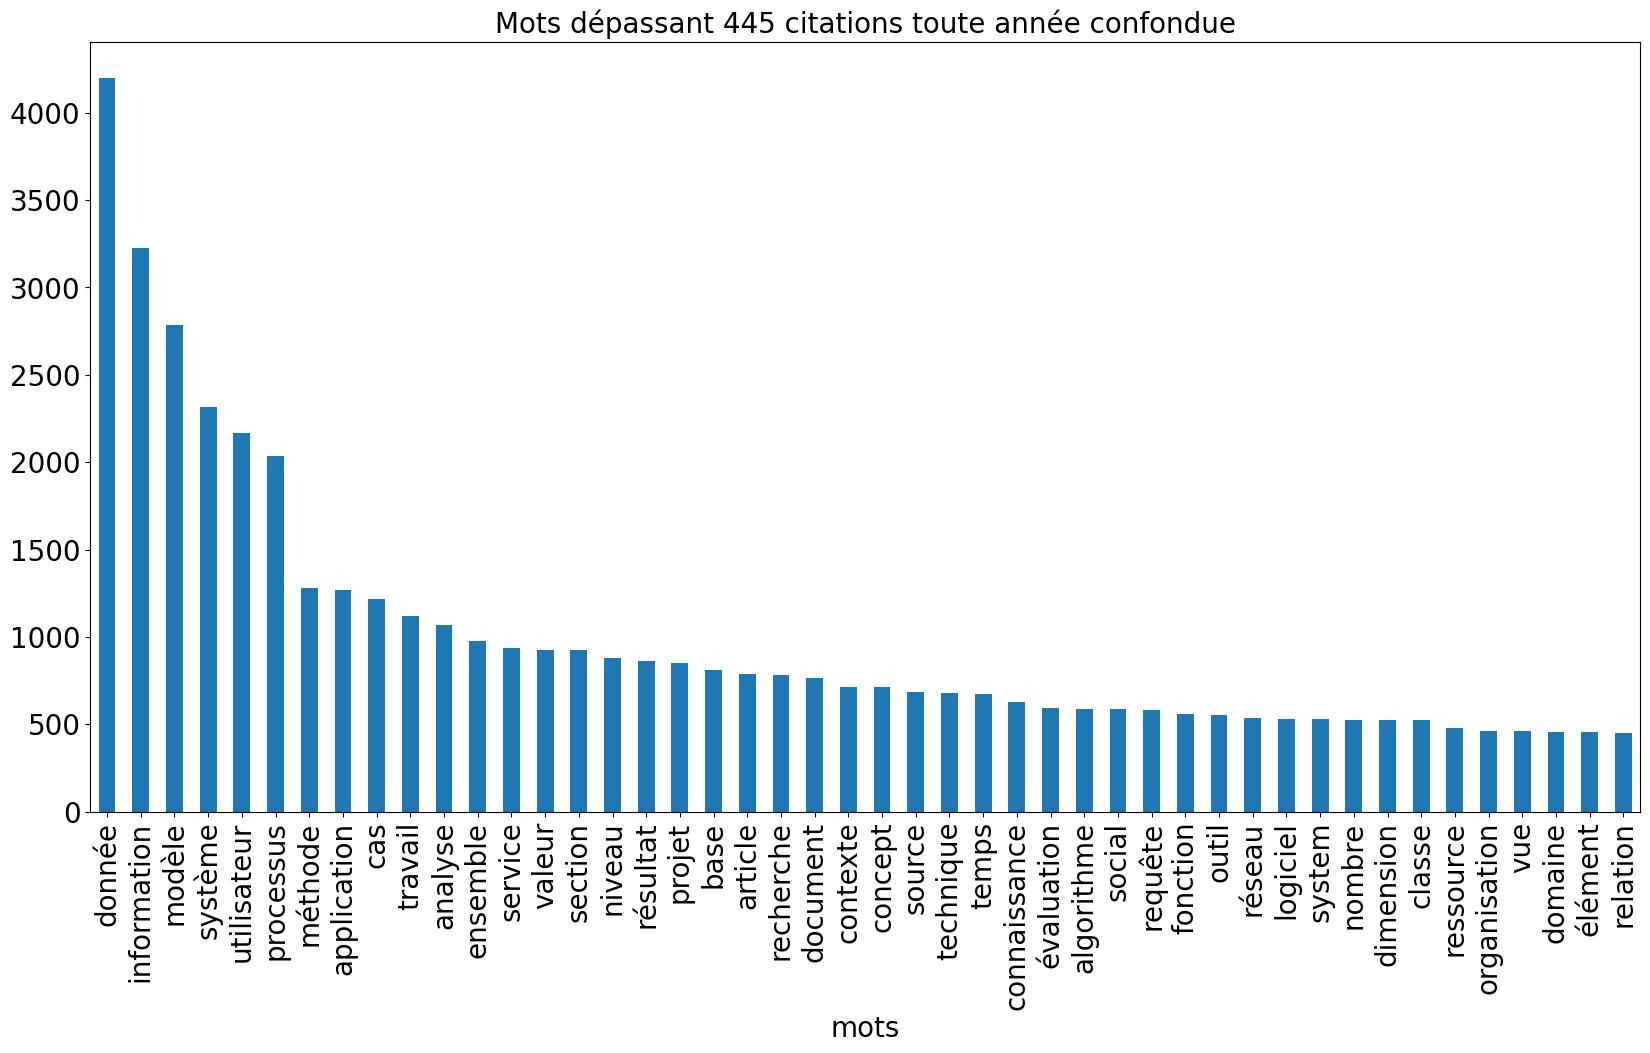

In [9]:
motsplusfreq.query('count > {}'.format(quartsup)).plot(kind='bar',
                                                       fontsize=20,
                                                       figsize=(20,10), legend=False)
plt.title('Mots dépassant {} citations toute année confondue'.format(quartsup), 
          fontsize=20)
plt.xlabel('mots', fontsize=20)


Text(0.5, 0, 'mots')

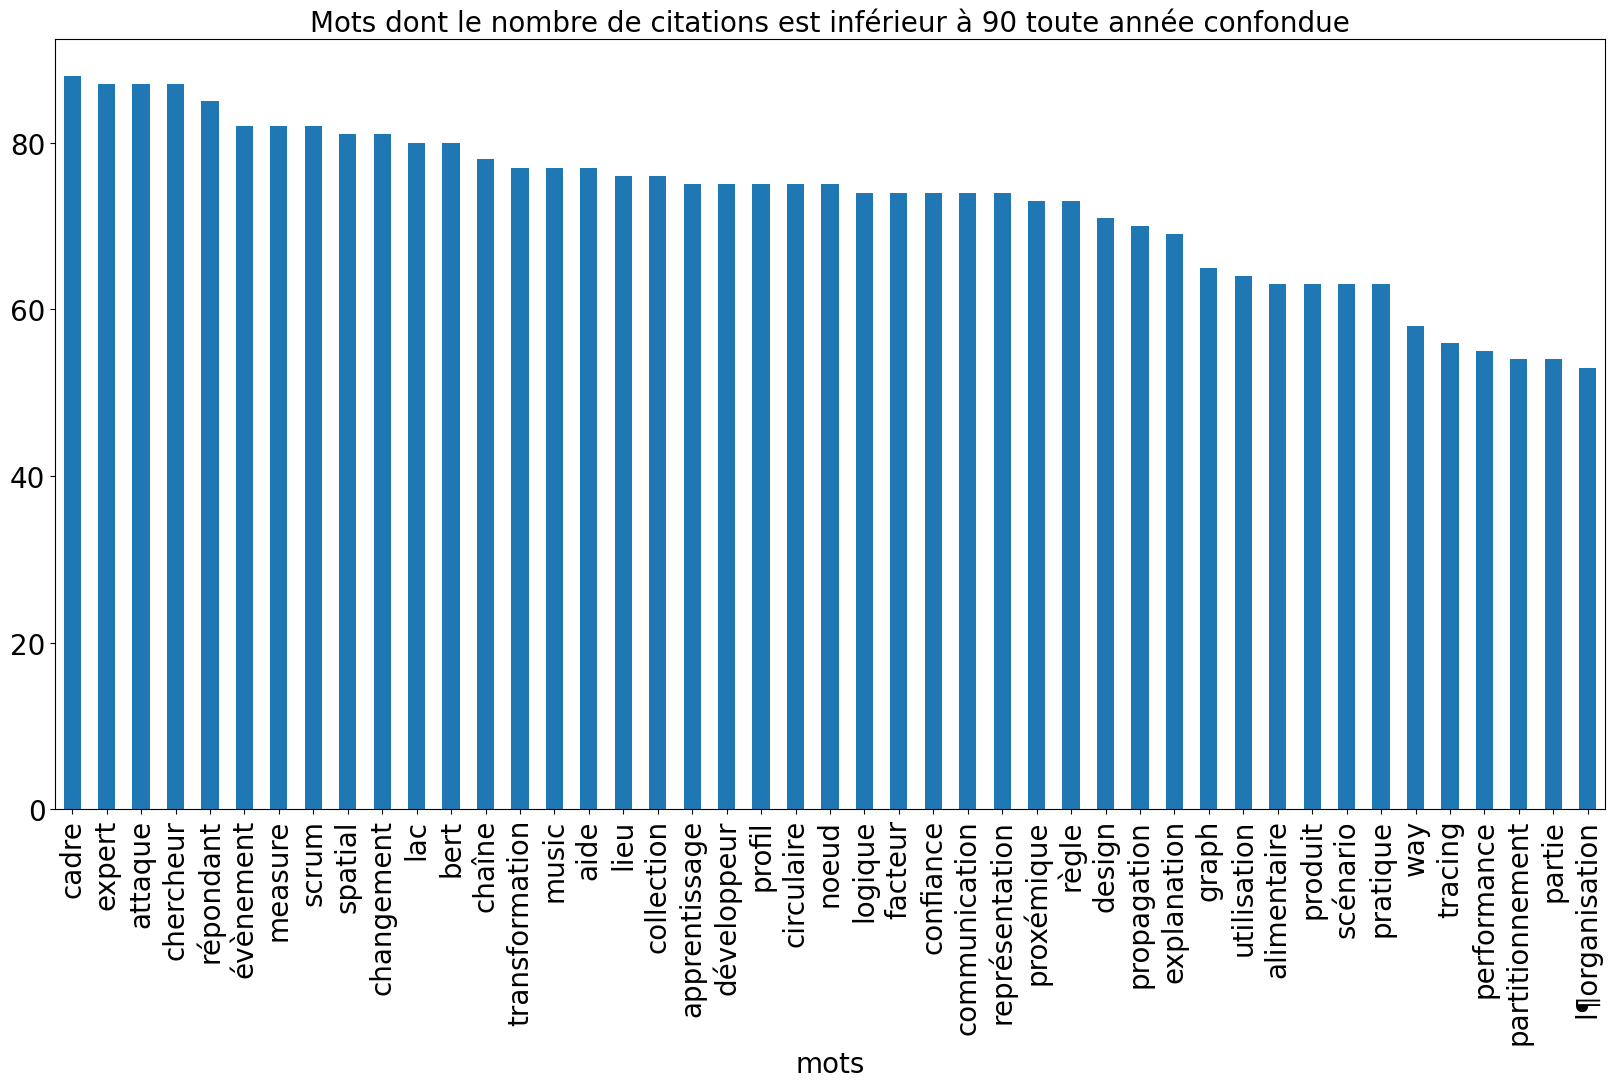

In [10]:
motsplusfreq.query('count < {}'.format(quartinf)).plot(kind='bar',
                                                       figsize=(20,10), 
                                                       fontsize=20,
                                                       legend=False)

plt.title('Mots dont le nombre de citations est inférieur à {} toute année confondue'.format(quartinf), 
          fontsize=20)
plt.xlabel('mots', fontsize=20)

In [11]:
motsplusfreq.query('count < {}'.format(quartinf)).sort_values(by='count', ascending=False)

count
word                  
cadre               88
attaque             87
chercheur           87
expert              87
répondant           85
évènement           82
measure             82
scrum               82
spatial             81
changement          81
bert                80
lac                 80
chaîne              78
transformation      77
music               77
aide                77
lieu                76
collection          76
proﬁl               75
circulaire          75
noeud               75
développeur         75
apprentissage       75
logique             74
facteur             74
conﬁance            74
communication       74
représentation      74
proxémique          73
règle               73
design              71
propagation         70
explanation         69
graph               65
utilisation         64
alimentaire         63
produit             63
scénario            63
pratique            63
way                 58
tracing             56
performance         55
partitionnement     54
partie              54
l¶organisation      53

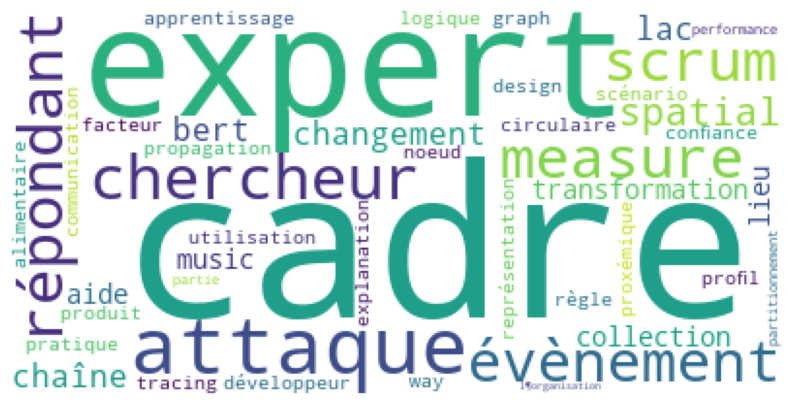

In [12]:
dico = motsplusfreq.query('count < {}'.format(quartinf)).to_dict()['count']

wc = WordCloud( max_words=len(dico), background_color="white").generate_from_frequencies(dico)
plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(wc)

## Analyse des bigrams les plus fréquents (toute année confondue)

On fait la même analyse maintenant pour les n-grams les plus fréquents de ces 10 dernières années. 

In [13]:
ngramcount = pnd.read_csv(file_ngrams_csv, delimiter=';', header=[0])

ngramcount.sample(10)

n-grams  count  \
267       ('lambda', 'architectur')     24   
163       ('information', 'system')     25   
1            ('abstract', 'syntax')     55   
31      ('chemin', 'factorisation')     20   
334  ('environnement', 'proxémiqu')     15   
452      ('système', 'information')     48   
13         ('modeling', 'language')     28   
75         ('politique', 'échange')     24   
7            ('entrepôt', 'donnée')     39   
450   ('sécurité', 'psychologique')     90   

                                              source  year  
267  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
163  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017  
1    ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014  
31   ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014  
334  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf  2020  
452  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
13   ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014  
75   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
7    ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014  
450  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023

In [14]:
bquartsup = int(ngramcount.describe()['count'][-2])
ngrams = len(ngramcount['n-grams'].unique()) 

print ('Nb de ngrams uniques :', ngrams)
print ('Frequence dernier quart :', bquartsup)

ngramcount.describe()

Nb de ngrams uniques : 399
Frequence dernier quart : 24


count         year
count  500.000000   500.000000
mean    22.212000  2018.500000
std     13.193604     2.875158
min     10.000000  2014.000000
25%     15.000000  2016.000000
50%     18.000000  2018.500000
75%     24.000000  2021.000000
max     96.000000  2023.000000

Nous avons 237 n-grams uniques, avec une moyenne de 30 citations pour chaque.

Le plus cité l'est 367 fois, alors que le moins cité l'est 13 fois. 

Le quart suppérieur des citaitons se trouve à 33 citations. 

In [15]:
ngramcount.sort_values(by=['count', 'year'], ascending=False, inplace=True)
ngramcount.head(15)

n-grams  count  \
100             ('open', 'source')     96   
450  ('sécurité', 'psychologique')     90   
250             ('open', 'source')     87   
50            ('réseau', 'social')     83   
350        ('processus', 'métier')     81   
150     ('système', 'information')     80   
200     ('système', 'information')     75   
201              ('lac', 'donnée')     73   
51      ('système', 'information')     72   
202             ('open', 'source')     69   
251             ('base', 'donnée')     67   
300              ('lac', 'donnée')     65   
451       ('chaîne', 'logistique')     62   
0       ('système', 'information')     59   
151             ('base', 'donnée')     58   

                                              source  year  
100  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf  2016  
450  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
250  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
50   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
350  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
150  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017  
200  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018  
201  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018  
51   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
202  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018  
251  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
300  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf  2020  
451  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
0    ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014  
151  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017

In [16]:
ngramcount.tail(15)

n-grams  count  \
449           ('machine', 'learning')     11   
386          ('sensible', 'contexte')     11   
387          ('proximity', 'tracing')     11   
388             ('composante', 'sin')     11   
389              ('vie', 'processus')     11   
390              ('premier', 'temps')     10   
391                    ('end', 'end')     10   
392  ('partitionnement', 'dynamique')     10   
393  ('partitionnement', 'classique')     10   
394   ('architecture', 'transformer')     10   
395                ('donnée', 'issu')     10   
396                   ('jeu', 'test')     10   
397                ('idf', 'dataset')     10   
398                ('dataset', 'idf')     10   
399   ('systématique', 'littérature')     10   

                                              source  year  
449  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022  
386  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
387  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
388  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
389  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
390  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
391  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
392  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
393  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
394  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
395  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
396  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
397  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
398  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
399  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021

...

In [17]:
ngramplusfreq = ngramcount[['n-grams','count']].groupby(by=['n-grams']).sum().sort_values(by=['count'], ascending=False)

bquartsup = int(ngramplusfreq.describe()['count'][-2])
bquartinf = int(ngramplusfreq.describe()['count'][-4])

print ('Quart suppérieur = ', bquartsup, 'Quart inférieur =',bquartinf)
ngramplusfreq.describe()

Quart suppérieur =  26 Quart inférieur = 15


count
count  399.000000
mean    27.834586
std     39.450468
min     10.000000
25%     15.000000
50%     18.000000
75%     26.500000
max    518.000000

In [18]:
ngramplusfreq.head(20)

count
n-grams                             
('système', 'information')       518
('base', 'donnée')               316
('open', 'source')               267
('processus', 'métier')          248
('information', 'system')        237
('réseau', 'social')             207
('jeu', 'donnée')                161
('lac', 'donnée')                138
('modèle', 'processus')          123
('état', 'art')                  116
('sécurité', 'psychologique')     90
('process', 'mining')             72
('langage', 'modélisation')       66
('chaîne', 'logistique')          62
('système', 'recommandation')     61
('van', 'der')                    59
('profil', 'utilisateur')         58
('projet', 'agile')               57
('abstract', 'syntax')            55
('personne', 'âgé')               53

In [19]:
ngramplusfreq.tail(20)

count
n-grams                                
('mise', 'jour')                     11
('composante', 'sin')                11
('vie', 'processus')                 11
('sensible', 'contexte')             11
('trajectoire', 'échelle')           11
('proximity', 'tracing')             11
('enjeu', 'numérique')               11
('design', 'thinking')               11
('donnée', 'graphe')                 11
('vie', 'intelligent')               11
('systématique', 'littérature')      10
('dataset', 'idf')                   10
('idf', 'dataset')                   10
('donnée', 'issu')                   10
('architecture', 'transformer')      10
('jeu', 'test')                      10
('partitionnement', 'classique')     10
('partitionnement', 'dynamique')     10
('premier', 'temps')                 10
('end', 'end')                       10

Parmis les n-grams les plus cités, on retrouve logiquement ('système', 'information') et ('base', 'donnée'), mais également ('processus', 'métier')	et ('open', 'source'), démontrant l'attachement de la communauté à ces deux sujets. 

Parmis les moins cités, on retrouve des éléments comme ('donnée', 'hétérogène') et ('conformité', 'processus'), relatives à des problématiques plutôt classiques dans les SI, mais également ('impact', 'environnemental') ou encore ('smart', 'life') démontrant la monté des sujets environnementaux dans la communauté.  

## Visualisation des n-grams les plus (et les moins) cités


Text(0.5, 0, 'Digrammes')

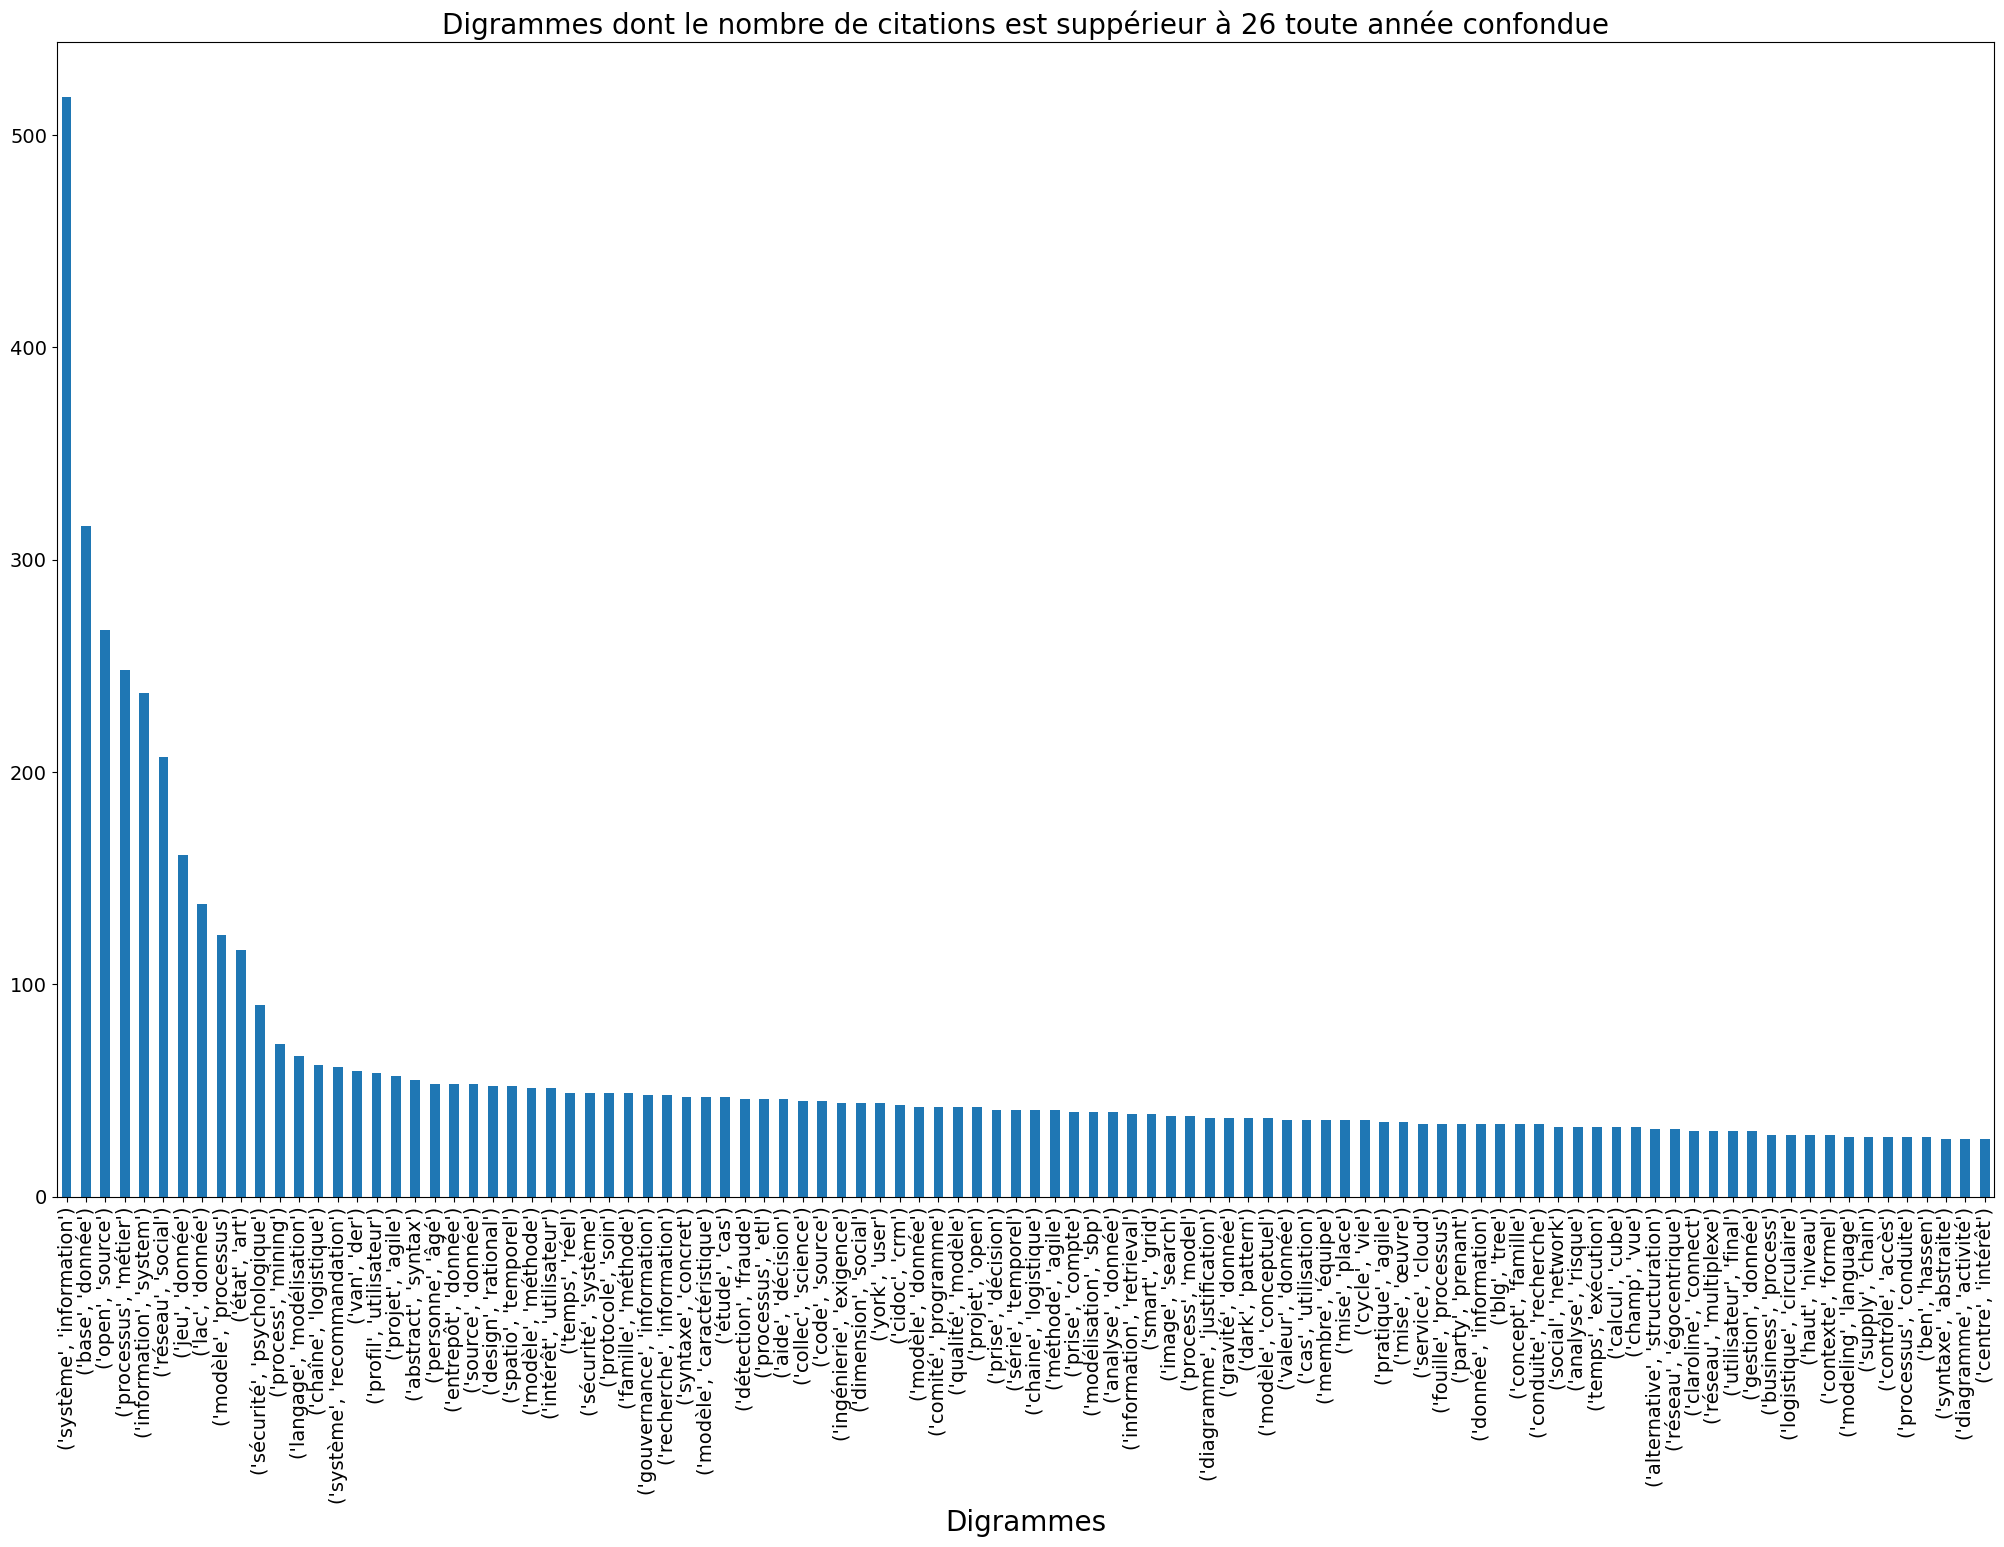

In [20]:
ngramplusfreq.query('count > {}'.format(bquartsup)).plot(kind='bar',
                                                         figsize=(25,15), 
                                                         fontsize=14,
                                                         legend=False)

plt.title('Digrammes dont le nombre de citations est suppérieur à {} toute année confondue'.format(bquartsup), 
          fontsize=20)

plt.xlabel('Digrammes', fontsize=20)


Text(0.5, 0, 'Digrammes')

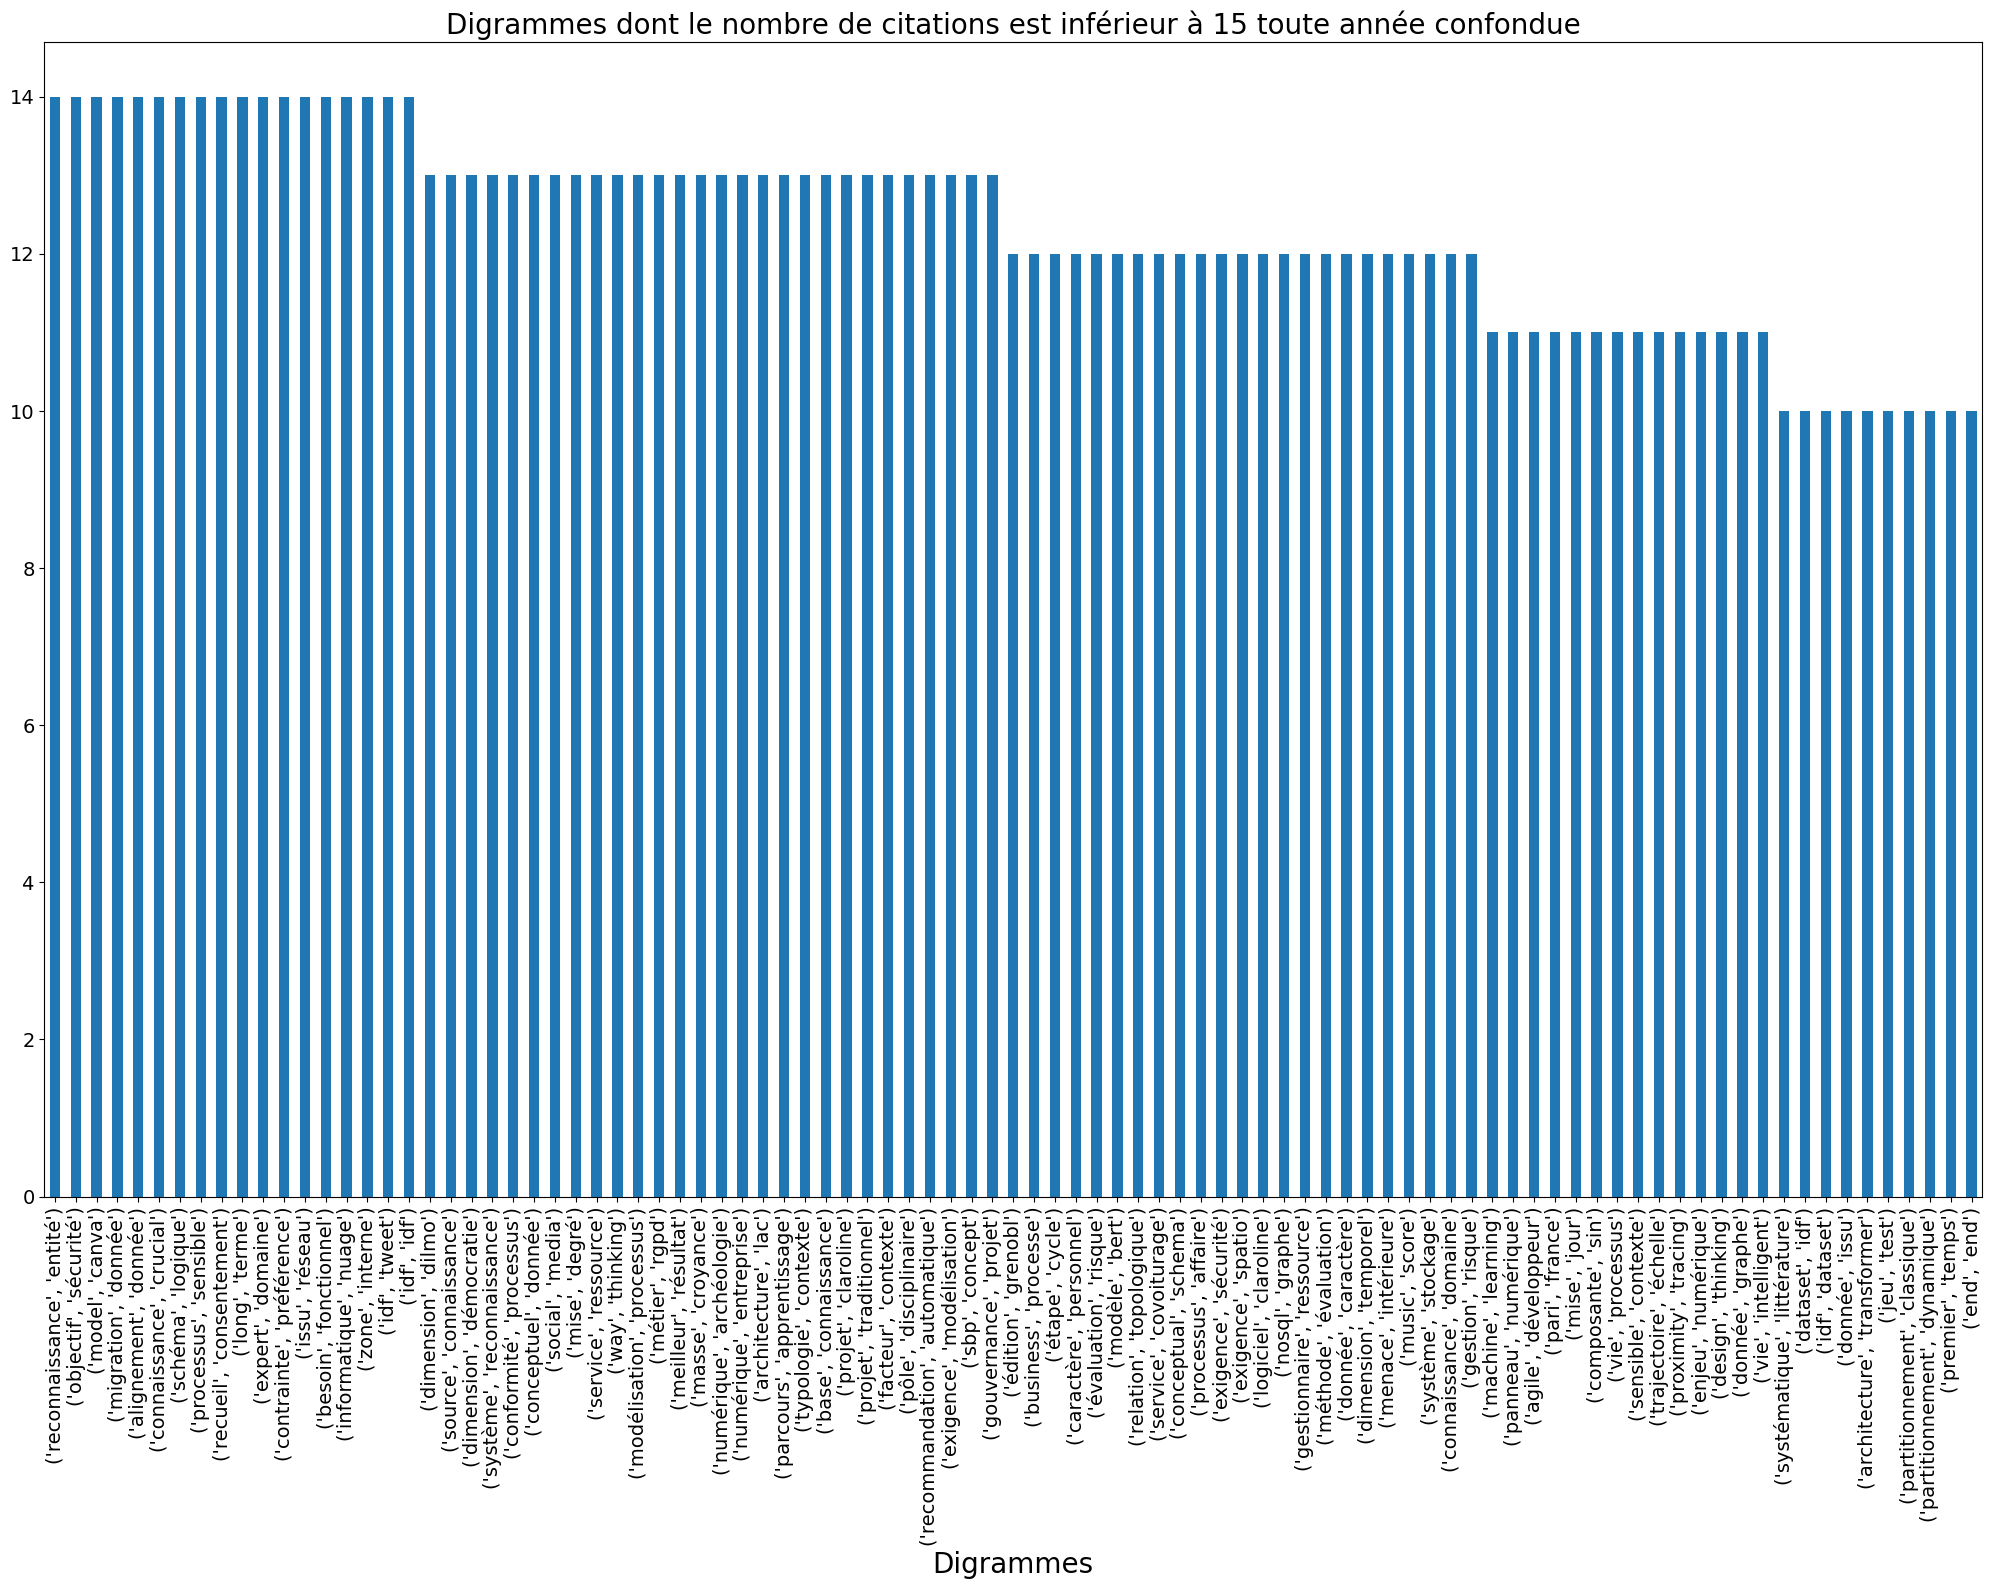

In [21]:
ngramplusfreq.query('count < {}'.format(bquartinf)).plot(kind='bar',
                                                         figsize=(25,15),
                                                         fontsize=14,
                                                         legend=False)

plt.title('Digrammes dont le nombre de citations est inférieur à {} toute année confondue'.format(bquartinf), 
          fontsize=20)

plt.xlabel('Digrammes', fontsize=20)


# Analyse de l'évolution dans le temps

Maintenant on va essayer d'analyser l'évolution dans le temps des mots les plus cités. 

In [22]:
sumword = wordcount.query('count > {}'.format(int(Aquartsup))).groupby(by=['word', 'year']).sum()
sumword.sort_values(by=['count', 'word'], ascending=False, inplace=True)
sumword

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/774527526.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumword = wordcount.query('count > {}'.format(int(Aquartsup))).groupby(by=['word', 'year']).sum()


count
word        year       
donnée      2018    747
modèle      2014    675
donnée      2014    624
            2017    593
information 2015    582
...                 ...
recherche   2017    149
ressource   2019    148
opérateur   2014    148
dimension   2014    148
article     2021    148

[124 rows x 1 columns]

On ne garde que les mots qui sont dans le quart suppérieur des mots les plus cités.

Text(0.5, 0, 'mots x citations par année')

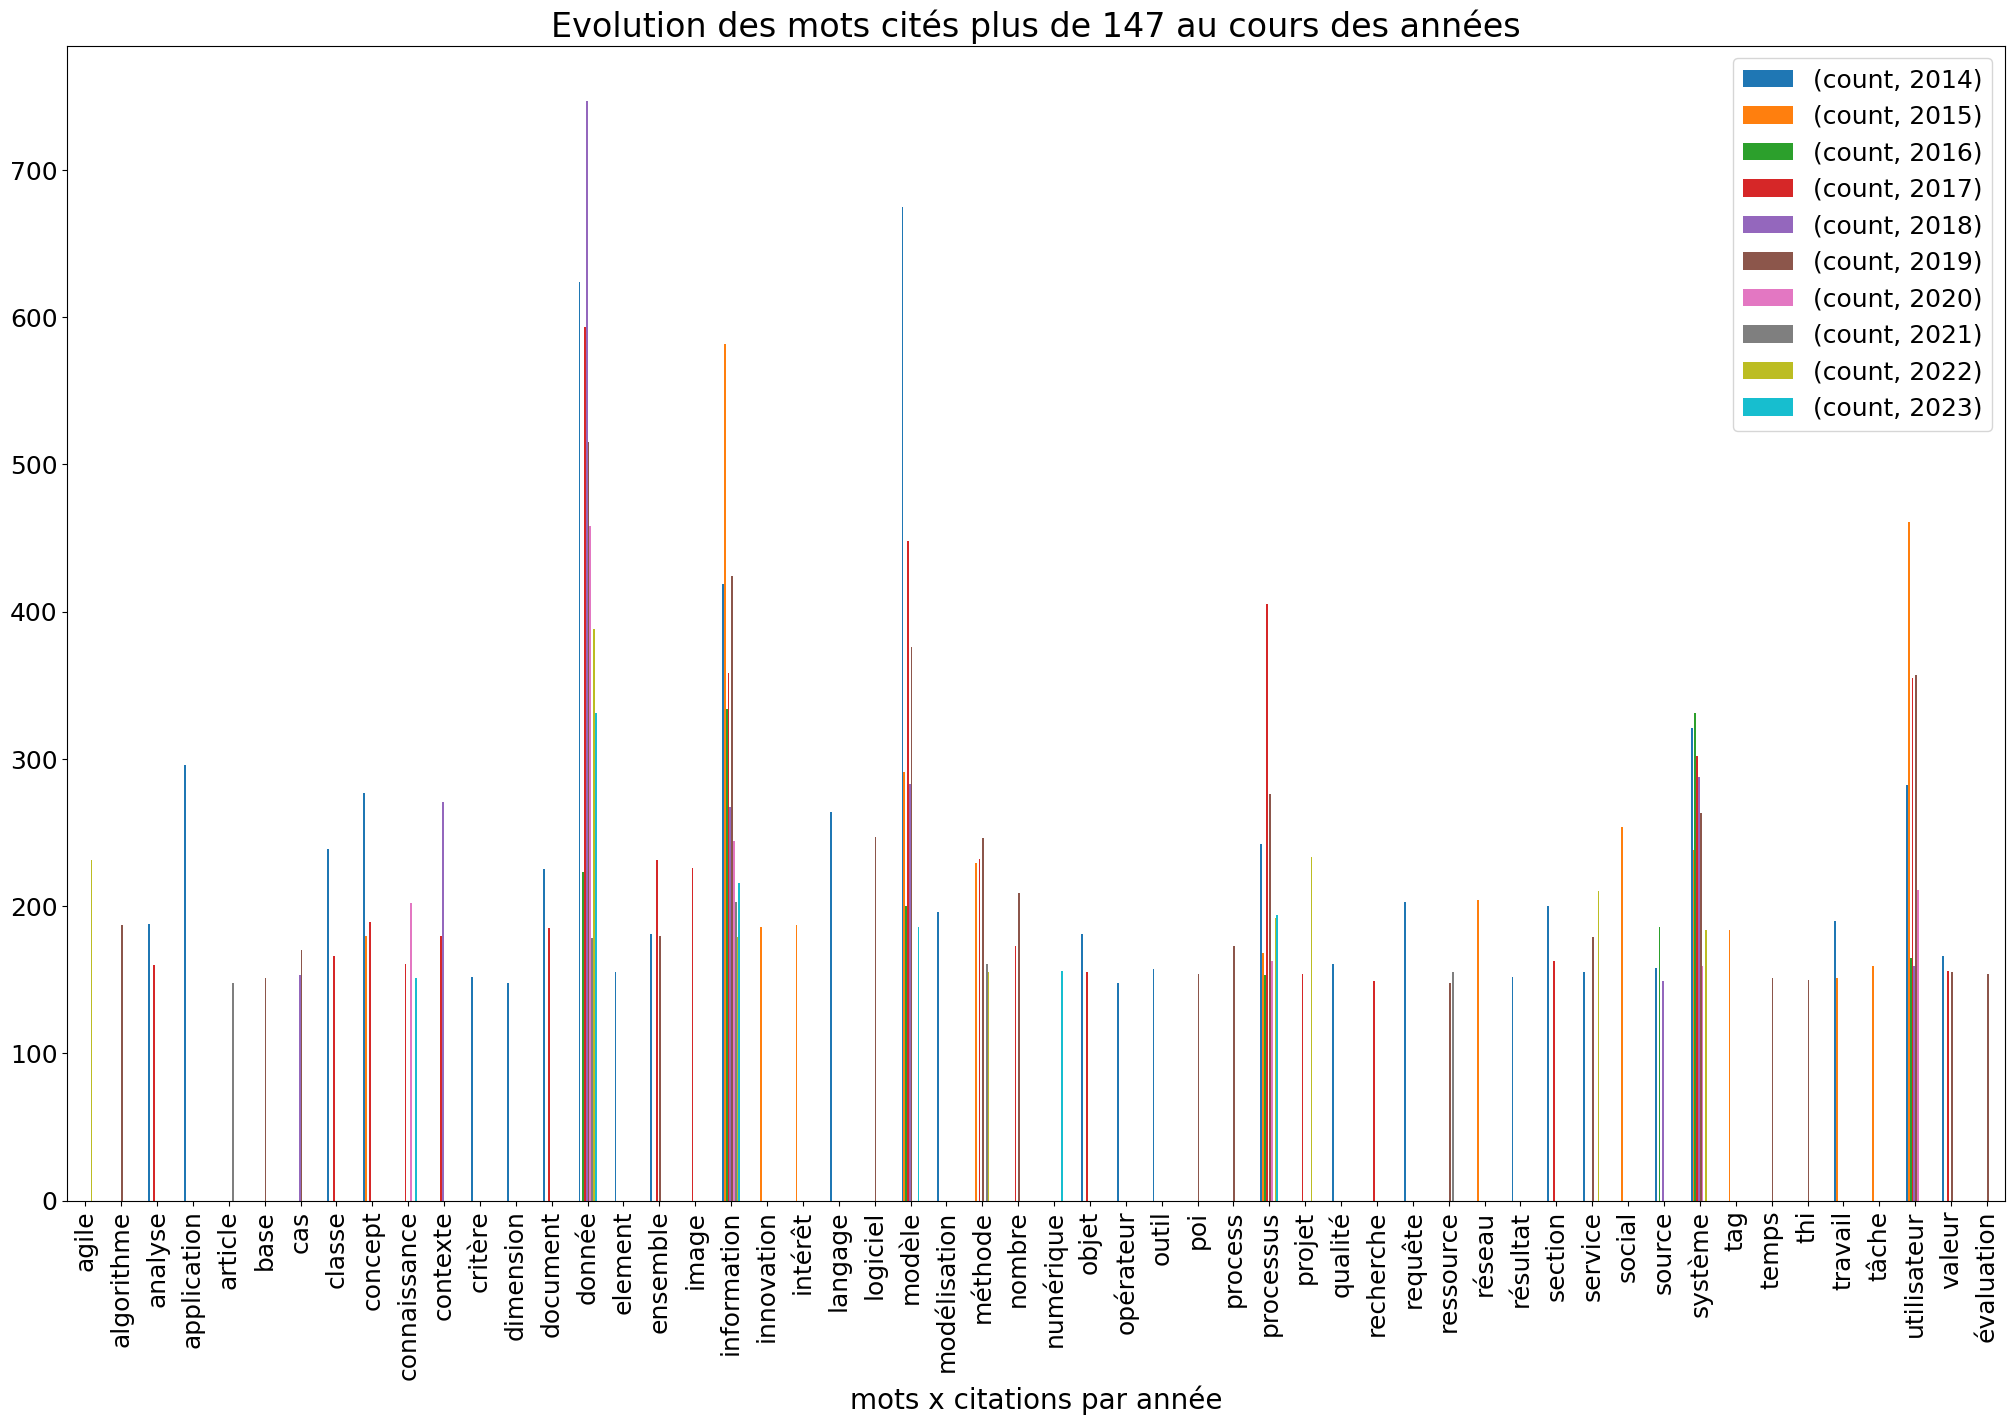

In [23]:
sumword.unstack().plot(kind='bar', figsize=(25,15), fontsize=18)
plt.title('Evolution des mots cités plus de {} au cours des années'.format(Aquartsup), 
          fontsize=24)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=18 )
plt.xlabel('mots x citations par année', fontsize=20)


encore trop, on essaye de réduire davantage.

De manière arbitraire, on va prendre les 10 mots les plus cités de ces 10 dernières années. 

In [24]:
seuil = 10

listemots = list(motsplusfreq.head(seuil).index.unique())
listemots

['donnée',
 'information',
 'modèle',
 'système',
 'utilisateur',
 'processus',
 'méthode',
 'application',
 'cas',
 'travail']

In [25]:
df_reduit = wordcount[ wordcount['word'].isin(listemots)]
df_reduit = df_reduit.sort_values(by=['word','count'], ascending=False).groupby(by=['word', 'year']).sum()
df_reduit

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2030341192.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_reduit = df_reduit.sort_values(by=['word','count'], ascending=False).groupby(by=['word', 'year']).sum()


count
word        year       
application 2014    296
            2015    102
            2016    121
            2017    127
            2018    112
...                 ...
utilisateur 2018    159
            2019    357
            2020    211
            2021     83
            2023     93

[95 rows x 1 columns]

Text(0.5, 0, 'mots x citations par année')

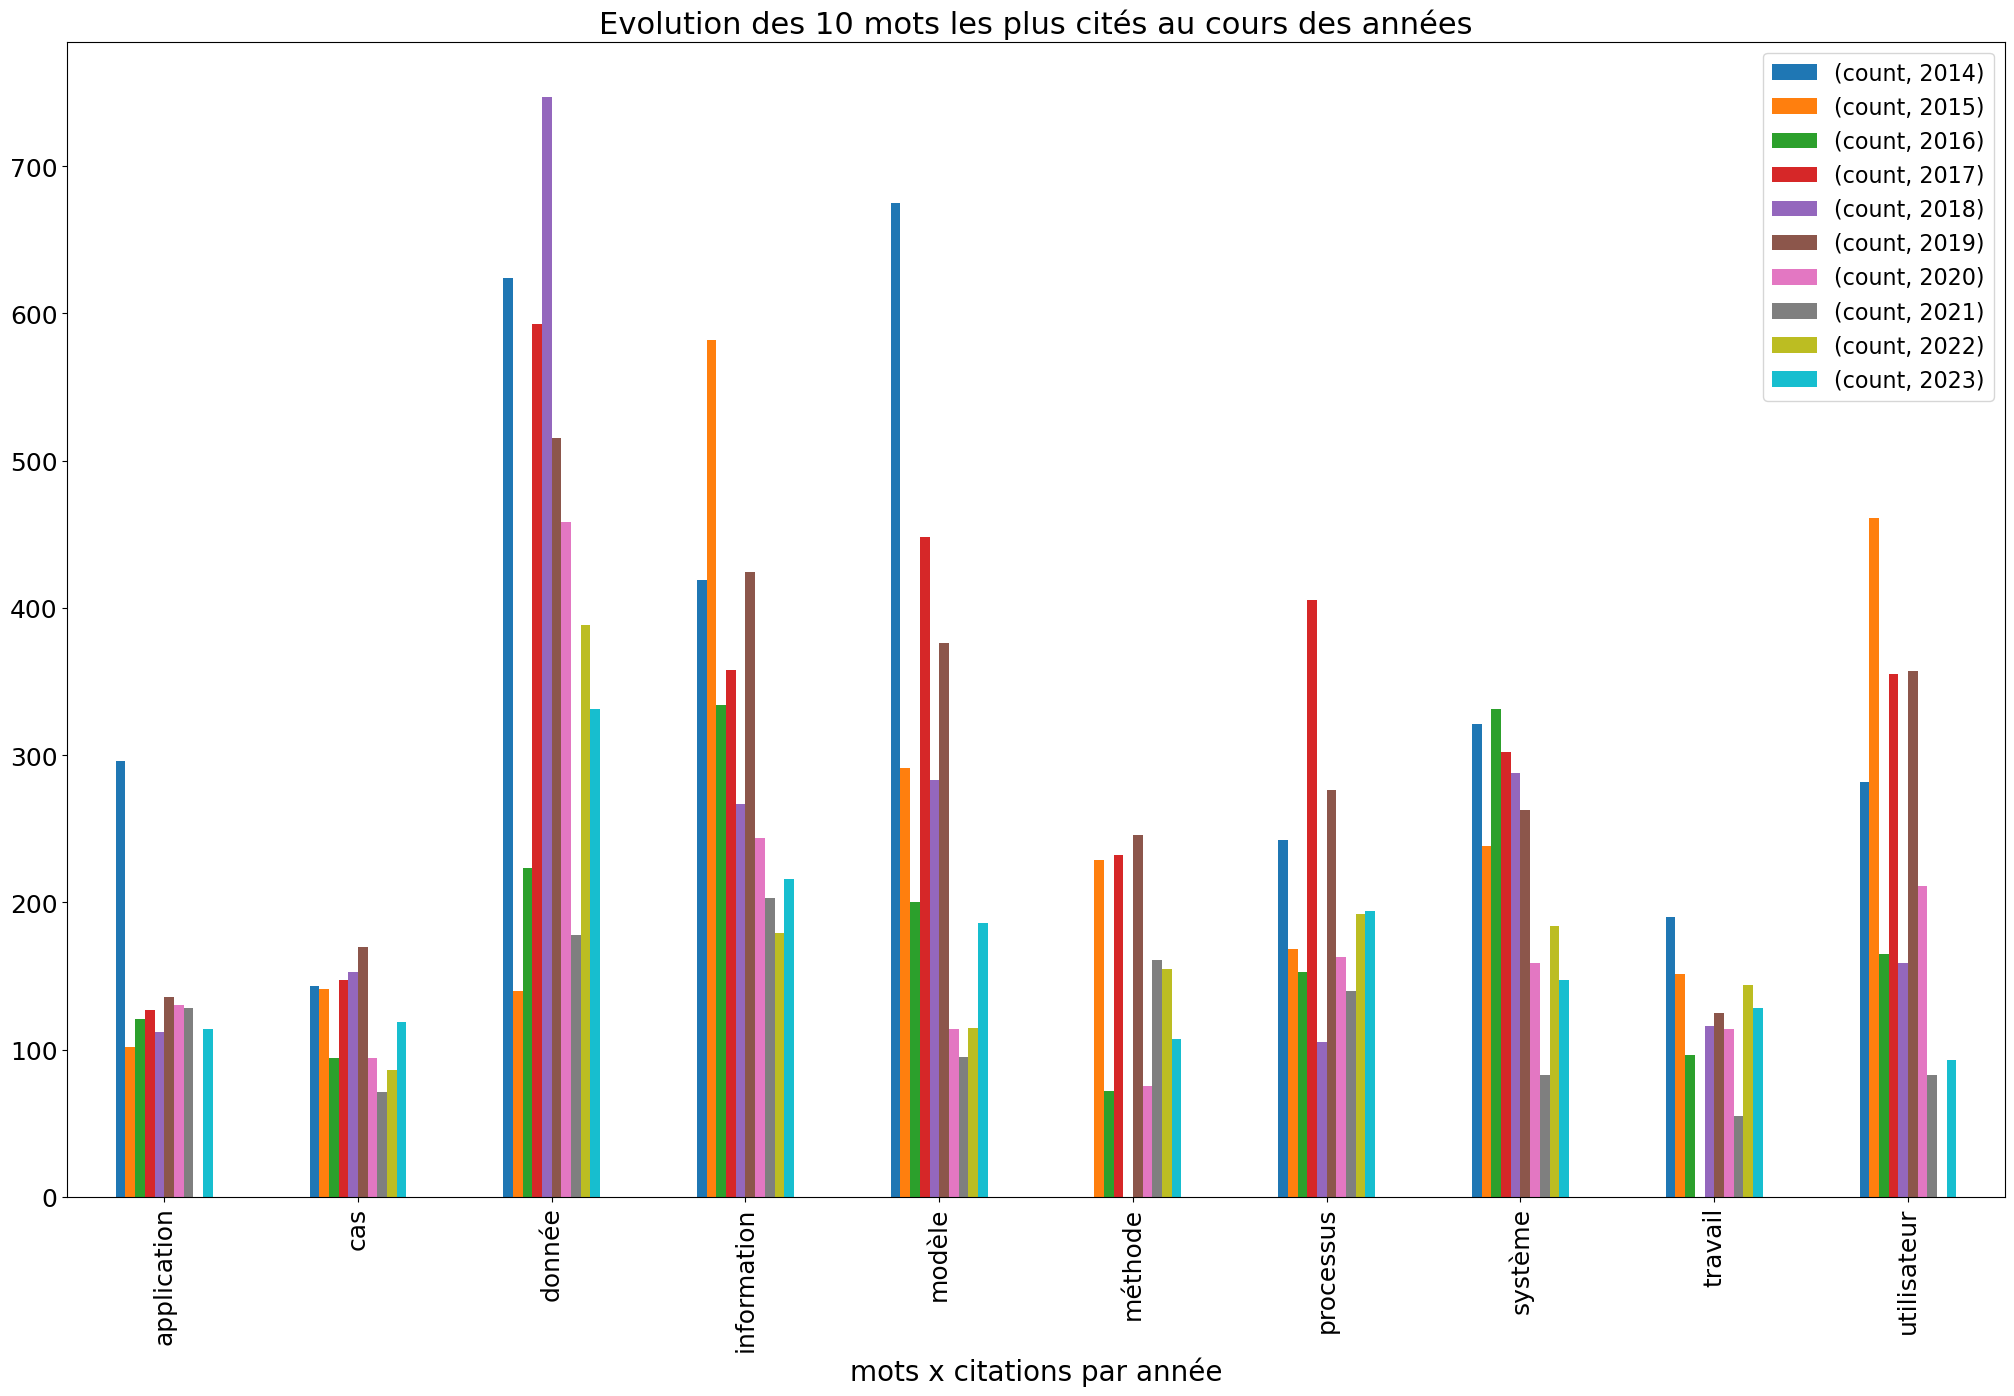

In [26]:
df_reduit.unstack().plot(kind='bar', figsize=(25,15), fontsize=18)
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=16)
plt.title('Evolution des 10 mots les plus cités au cours des années', 
          fontsize=22)
plt.xlabel('mots x citations par année', fontsize=20)


On va enregistrer le CSV avec les sommes afin de pouvoir produire des graphiques avec d'autres outils que Python. 

In [27]:
wordcount.sort_values(by=['word','count'], 
                      ascending=False).groupby(by=['word', 'year']).sum().to_csv(
                          (output_dir+'/sumwords.csv'), sep=';', header=True)

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/141145415.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wordcount.sort_values(by=['word','count'],


Les 10 les moins cités ces 10 dernièes années (pour voir l'appartion de nouvelles thématiques).

In [28]:
df_tail = wordcount[ wordcount['word'].isin(list(motsplusfreq.tail(seuil).index.unique())) ]
df_tail = df_tail.sort_values(by=['word','count'], ascending=False).groupby(by=['word', 'year']).sum()
df_tail

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/3856856371.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tail = df_tail.sort_values(by=['word','count'], ascending=False).groupby(by=['word', 'year']).sum()


count
word            year       
alimentaire     2023     63
l¶organisation  2021     53
partie          2021     54
partitionnement 2021     54
performance     2021     55
pratique        2023     63
produit         2023     63
scénario        2023     63
tracing         2021     56
way             2021     58

Text(0.5, 0, 'mots x citations par année')

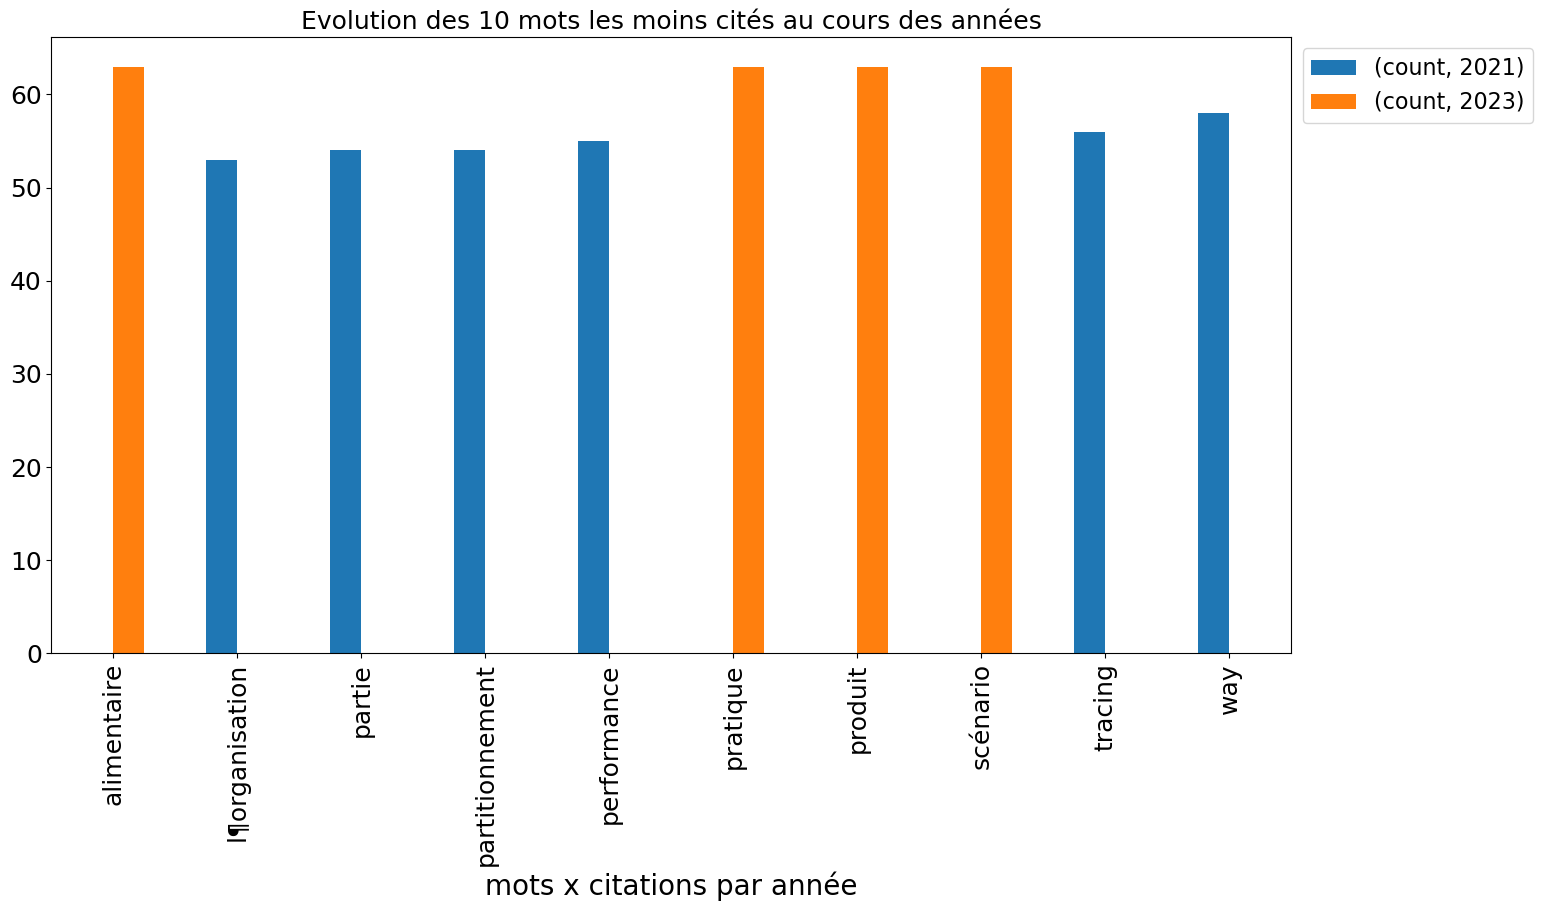

In [29]:
df_tail.unstack().plot(kind='bar', figsize=(16,8), fontsize=18)
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=16)
plt.title('Evolution des 10 mots les moins cités au cours des années', 
          fontsize=18)
plt.xlabel('mots x citations par année', fontsize=20)


/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1858567246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tail = wordcount.query('count < {}'.format(int(Aquartinf))).sort_values(by=['word','count'],


Text(0.5, 0, 'mots x citations par année')

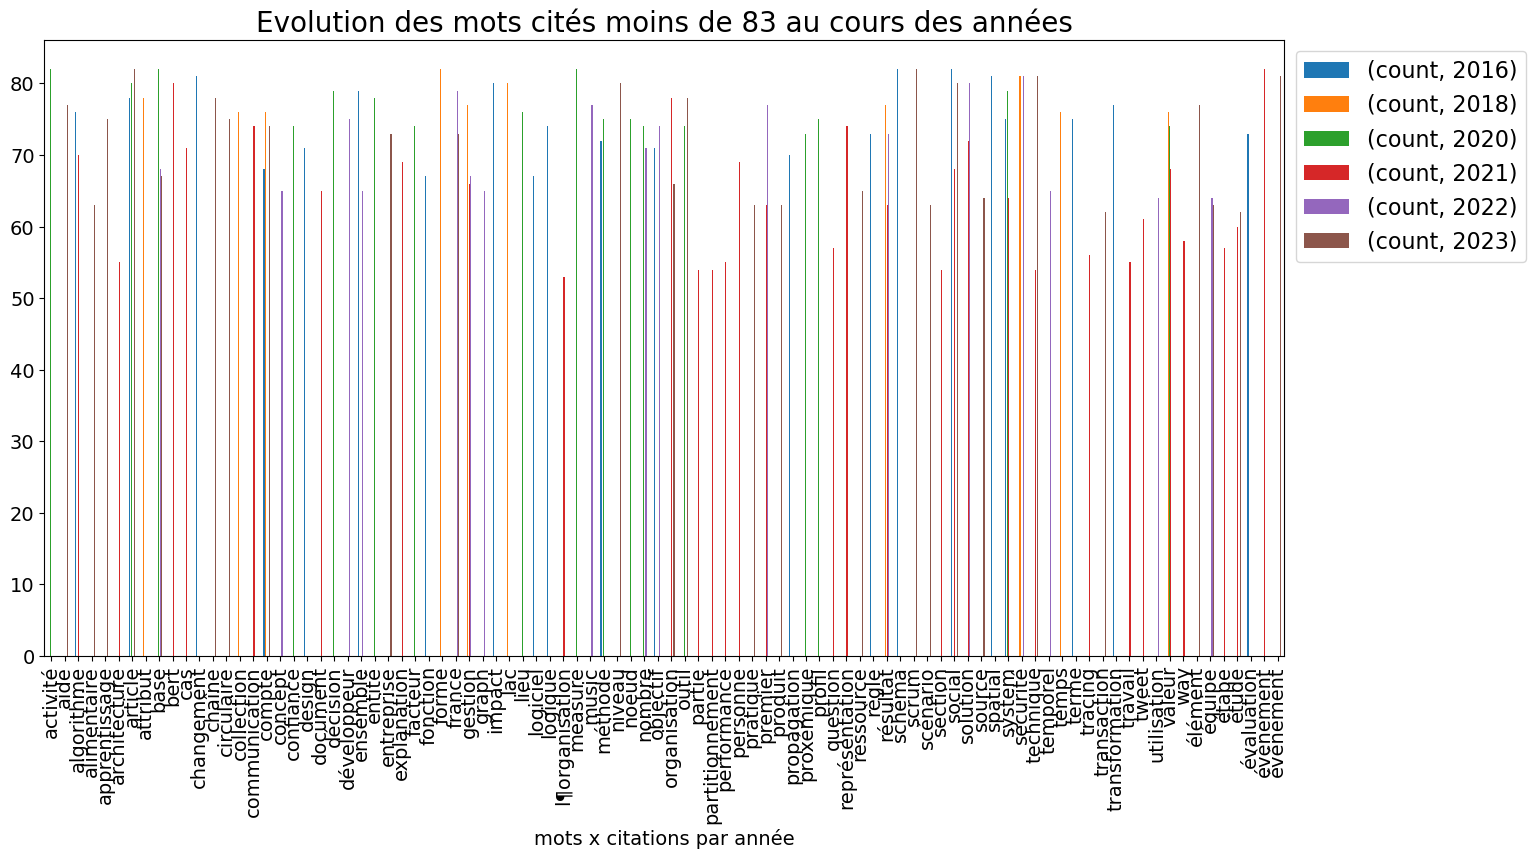

In [30]:
df_tail = wordcount.query('count < {}'.format(int(Aquartinf))).sort_values(by=['word','count'],
                                                                ascending=False).groupby(by=['word', 'year']).sum()
df_tail.unstack().plot(kind='bar', figsize=(16,8), fontsize=14)
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=16)
plt.title('Evolution des mots cités moins de {} au cours des années'.format(Aquartinf), 
          fontsize=20)
plt.xlabel('mots x citations par année', fontsize=14)

on va essayer de trouver des sujets qui étaient dans les 5 dernières éditions et qui ne sont plus dans les autres, et vice-versa

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2728604347.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_newsones = df_newsones.sort_values(by=['word','count'], ascending=False).groupby(by=['word', 'year']).sum()


Text(0.5, 0, 'mots x citations par année')

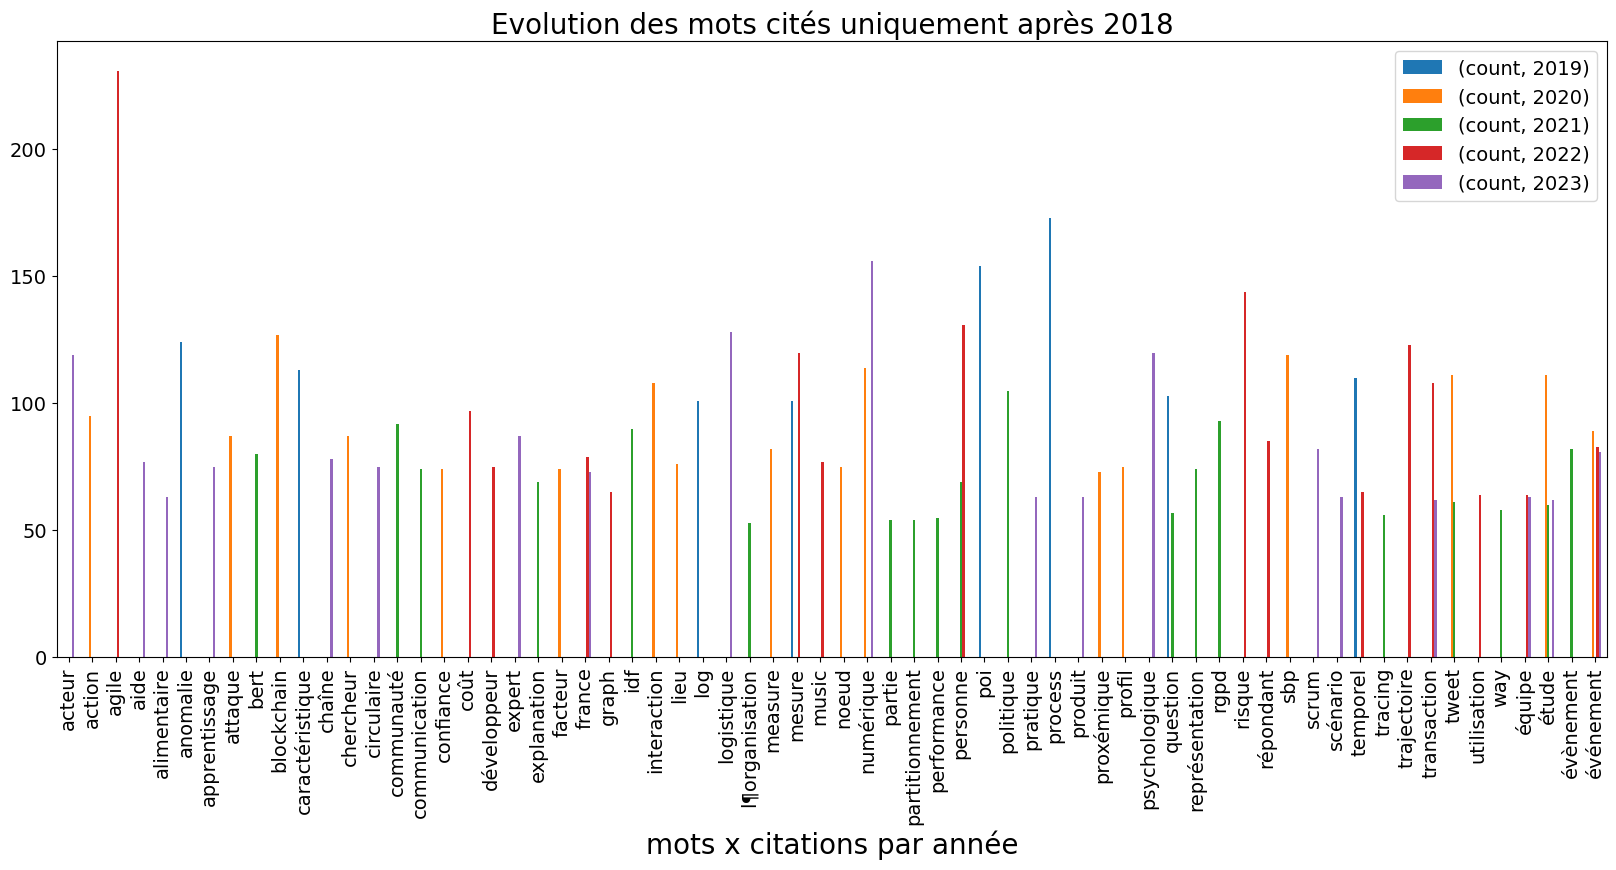

In [31]:
df_newsones = wordcount [ ~wordcount['word'].isin(list(wordcount.query('year <= 2018')['word'])) ]
df_newsones = df_newsones.sort_values(by=['word','count'], ascending=False).groupby(by=['word', 'year']).sum()
df_newsones.sort_values(by=['count'],ascending=False, inplace=True)
df_newsones.unstack().plot(kind='bar', figsize=(20,8), fontsize=14)
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=14)
plt.title('Evolution des mots cités uniquement après 2018', 
          fontsize=20)
plt.xlabel('mots x citations par année', fontsize=20)


même chose pour ceux qui ne sont plus aux 5 dernières années

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1812892525.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oldones = df_oldones.sort_values(by=['word','count'], ascending=False).groupby(by=['word', 'year']).sum()


Text(0.5, 0, 'mots x citations par année')

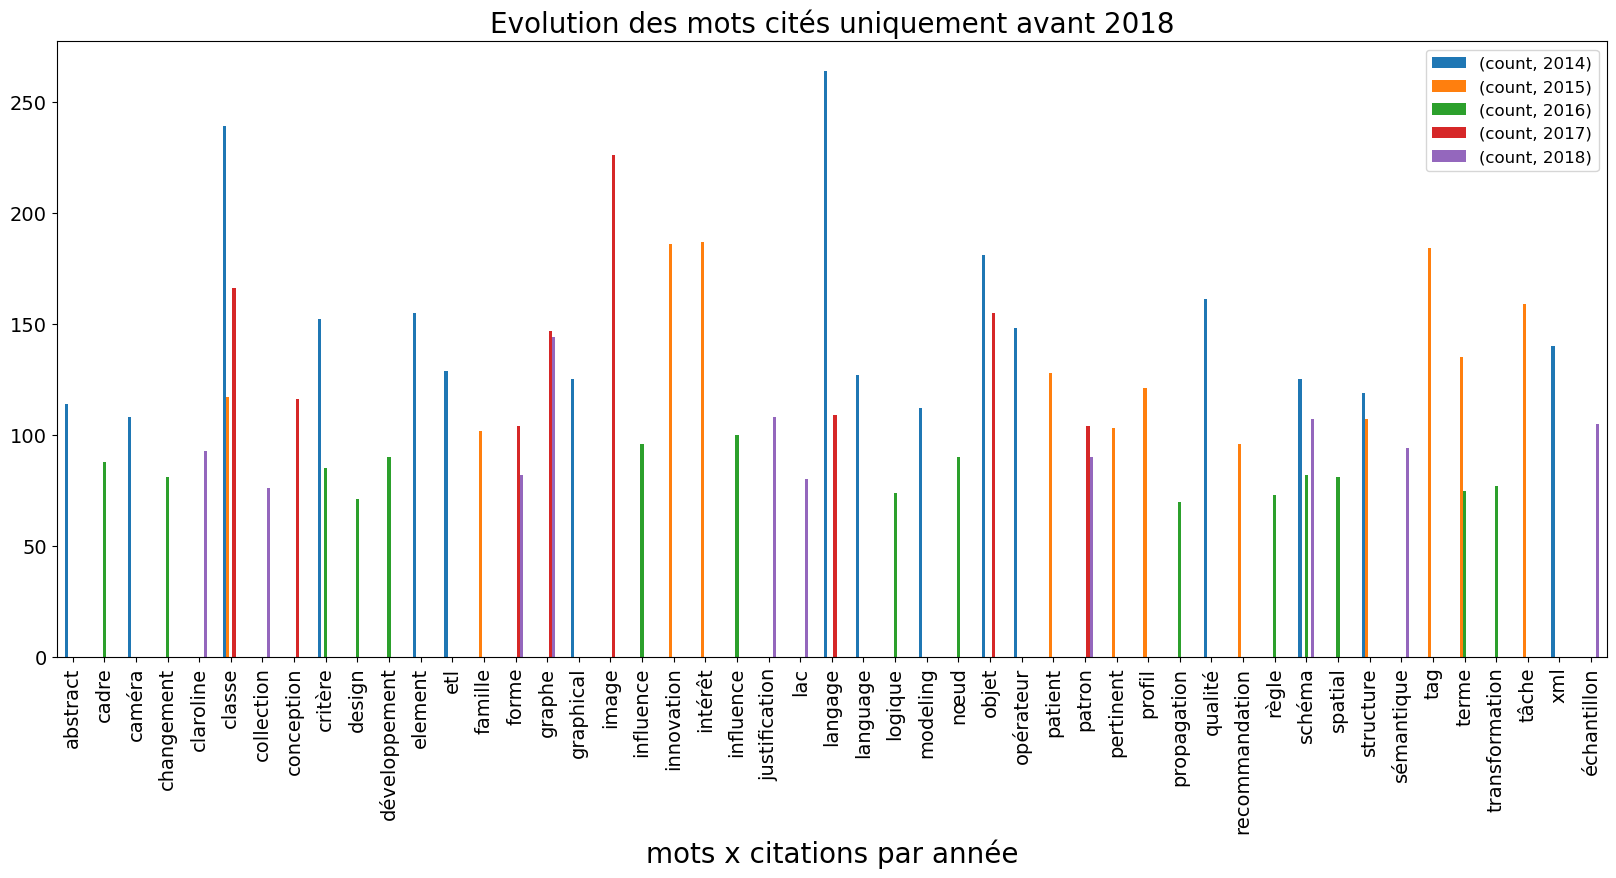

In [32]:
old = list(wordcount.query('year > 2018')['word'])
df_oldones = wordcount [ ~wordcount['word'].isin(old) ]
df_oldones = df_oldones.sort_values(by=['word','count'], ascending=False).groupby(by=['word', 'year']).sum()
df_oldones.unstack().plot(kind='bar', figsize=(20,8), fontsize=14)
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.title('Evolution des mots cités uniquement avant 2018', 
          fontsize=20)
plt.xlabel('mots x citations par année', fontsize=20)


/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2609119339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ap2018 = wordcount [ ~wordcount['word'].isin(list(wordcount.query('year < 2018')['word'])) ].groupby(by=['word']).sum()['count'].to_dict()


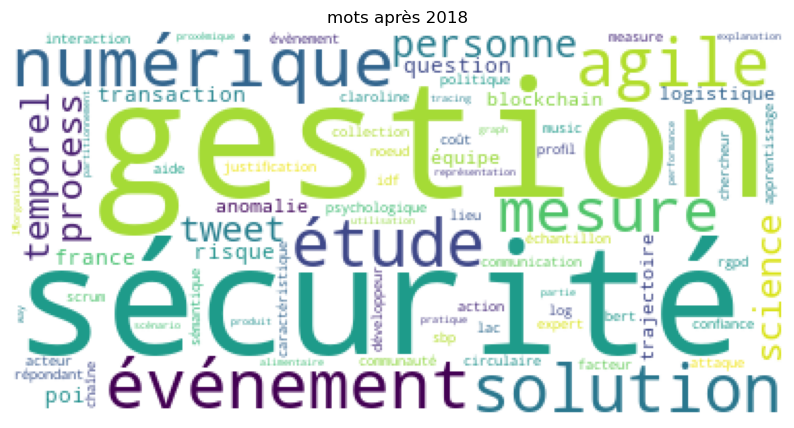

In [33]:
ap2018 = wordcount [ ~wordcount['word'].isin(list(wordcount.query('year < 2018')['word'])) ].groupby(by=['word']).sum()['count'].to_dict()
wc = WordCloud( max_words=len(ap2018), background_color="white").generate_from_frequencies(ap2018)
plt.figure(figsize=(10,6))
plt.title('mots après 2018')
plt.axis('off')
plt.imshow(wc)

In [104]:
ap2018

{'acteur': 119,
 'action': 95,
 'agile': 231,
 'aide': 77,
 'alimentaire': 63,
 'anomalie': 124,
 'apprentissage': 75,
 'attaque': 87,
 'bert': 80,
 'blockchain': 127,
 'caractéristique': 113,
 'chaîne': 78,
 'chercheur': 87,
 'circulaire': 75,
 'claroline': 93,
 'collection': 76,
 'communauté': 92,
 'communication': 74,
 'conﬁance': 74,
 'coût': 97,
 'développeur': 75,
 'expert': 87,
 'explanation': 69,
 'facteur': 74,
 'france': 152,
 'gestion': 300,
 'graph': 65,
 'idf': 90,
 'interaction': 108,
 'justiﬁcation': 108,
 'lac': 80,
 'lieu': 76,
 'log': 101,
 'logistique': 128,
 'l¶organisation': 53,
 'measure': 82,
 'mesure': 221,
 'music': 77,
 'noeud': 75,
 'numérique': 270,
 'partie': 54,
 'partitionnement': 54,
 'performance': 55,
 'personne': 200,
 'poi': 154,
 'politique': 105,
 'pratique': 63,
 'process': 173,
 'produit': 63,
 'proxémique': 73,
 'proﬁl': 75,
 'psychologique': 120,
 'question': 160,
 'représentation': 74,
 'rgpd': 93,
 'risque': 144,
 'répondant': 85,
 'sbp': 119

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2056537339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  av2018 = wordcount [ ~wordcount['word'].isin(old) ].groupby(by=['word']).sum()['count'].to_dict()


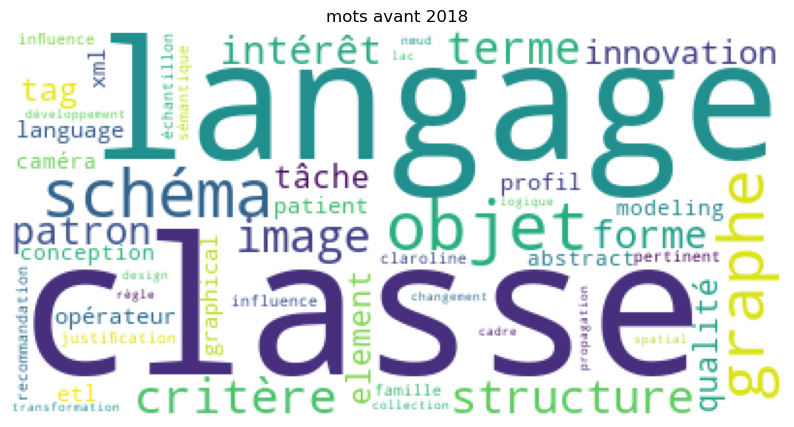

In [34]:
av2018 = wordcount [ ~wordcount['word'].isin(old) ].groupby(by=['word']).sum()['count'].to_dict()
wc = WordCloud( max_words=len(av2018), background_color="white").generate_from_frequencies(av2018)
plt.figure(figsize=(10,6))
plt.title('mots avant 2018')
plt.axis('off')
plt.imshow(wc)

# Analyse des variations sur les digrammes

on essaie de voir l'évolution (variation) des digrammes au cours des années. 

In [35]:

sumngram = ngramcount.query('count >= {}'.format(int(bquartsup))).groupby(by=['n-grams', 'year']).sum()
sumngram.sort_values(by=['count', 'n-grams'], ascending=False, inplace=True)
sumngram

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/4176575225.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumngram = ngramcount.query('count >= {}'.format(int(bquartsup))).groupby(by=['n-grams', 'year']).sum()


count
n-grams                        year       
('open', 'source')             2016     96
('sécurité', 'psychologique')  2023     90
('open', 'source')             2019     87
('réseau', 'social')           2015     83
('processus', 'métier')        2021     81
...                                    ...
('détection', 'anomalie')      2019     26
('document', 'xml')            2014     26
('cadre', 'référence')         2016     26
('architecture', 'conception') 2015     26
('aide', 'alimentaire')        2023     26

[108 rows x 1 columns]

In [36]:
ngrams = len(sumngram.index.get_level_values('n-grams').unique())
print('nb n-grams unique', ngrams)
sumngram.describe()

nb n-grams unique 83


count
count  108.000000
mean    41.796296
std     16.246213
min     26.000000
25%     29.000000
50%     37.000000
75%     49.000000
max     96.000000

Nous avons autour de 47 digrammes, cités en moyenne 50 fois en tout.  

In [37]:
sumngram.to_csv((output_dir+'/sumngrams.csv'), sep=';', header=True)

Text(0.5, 0, 'digrammes x citations par année')

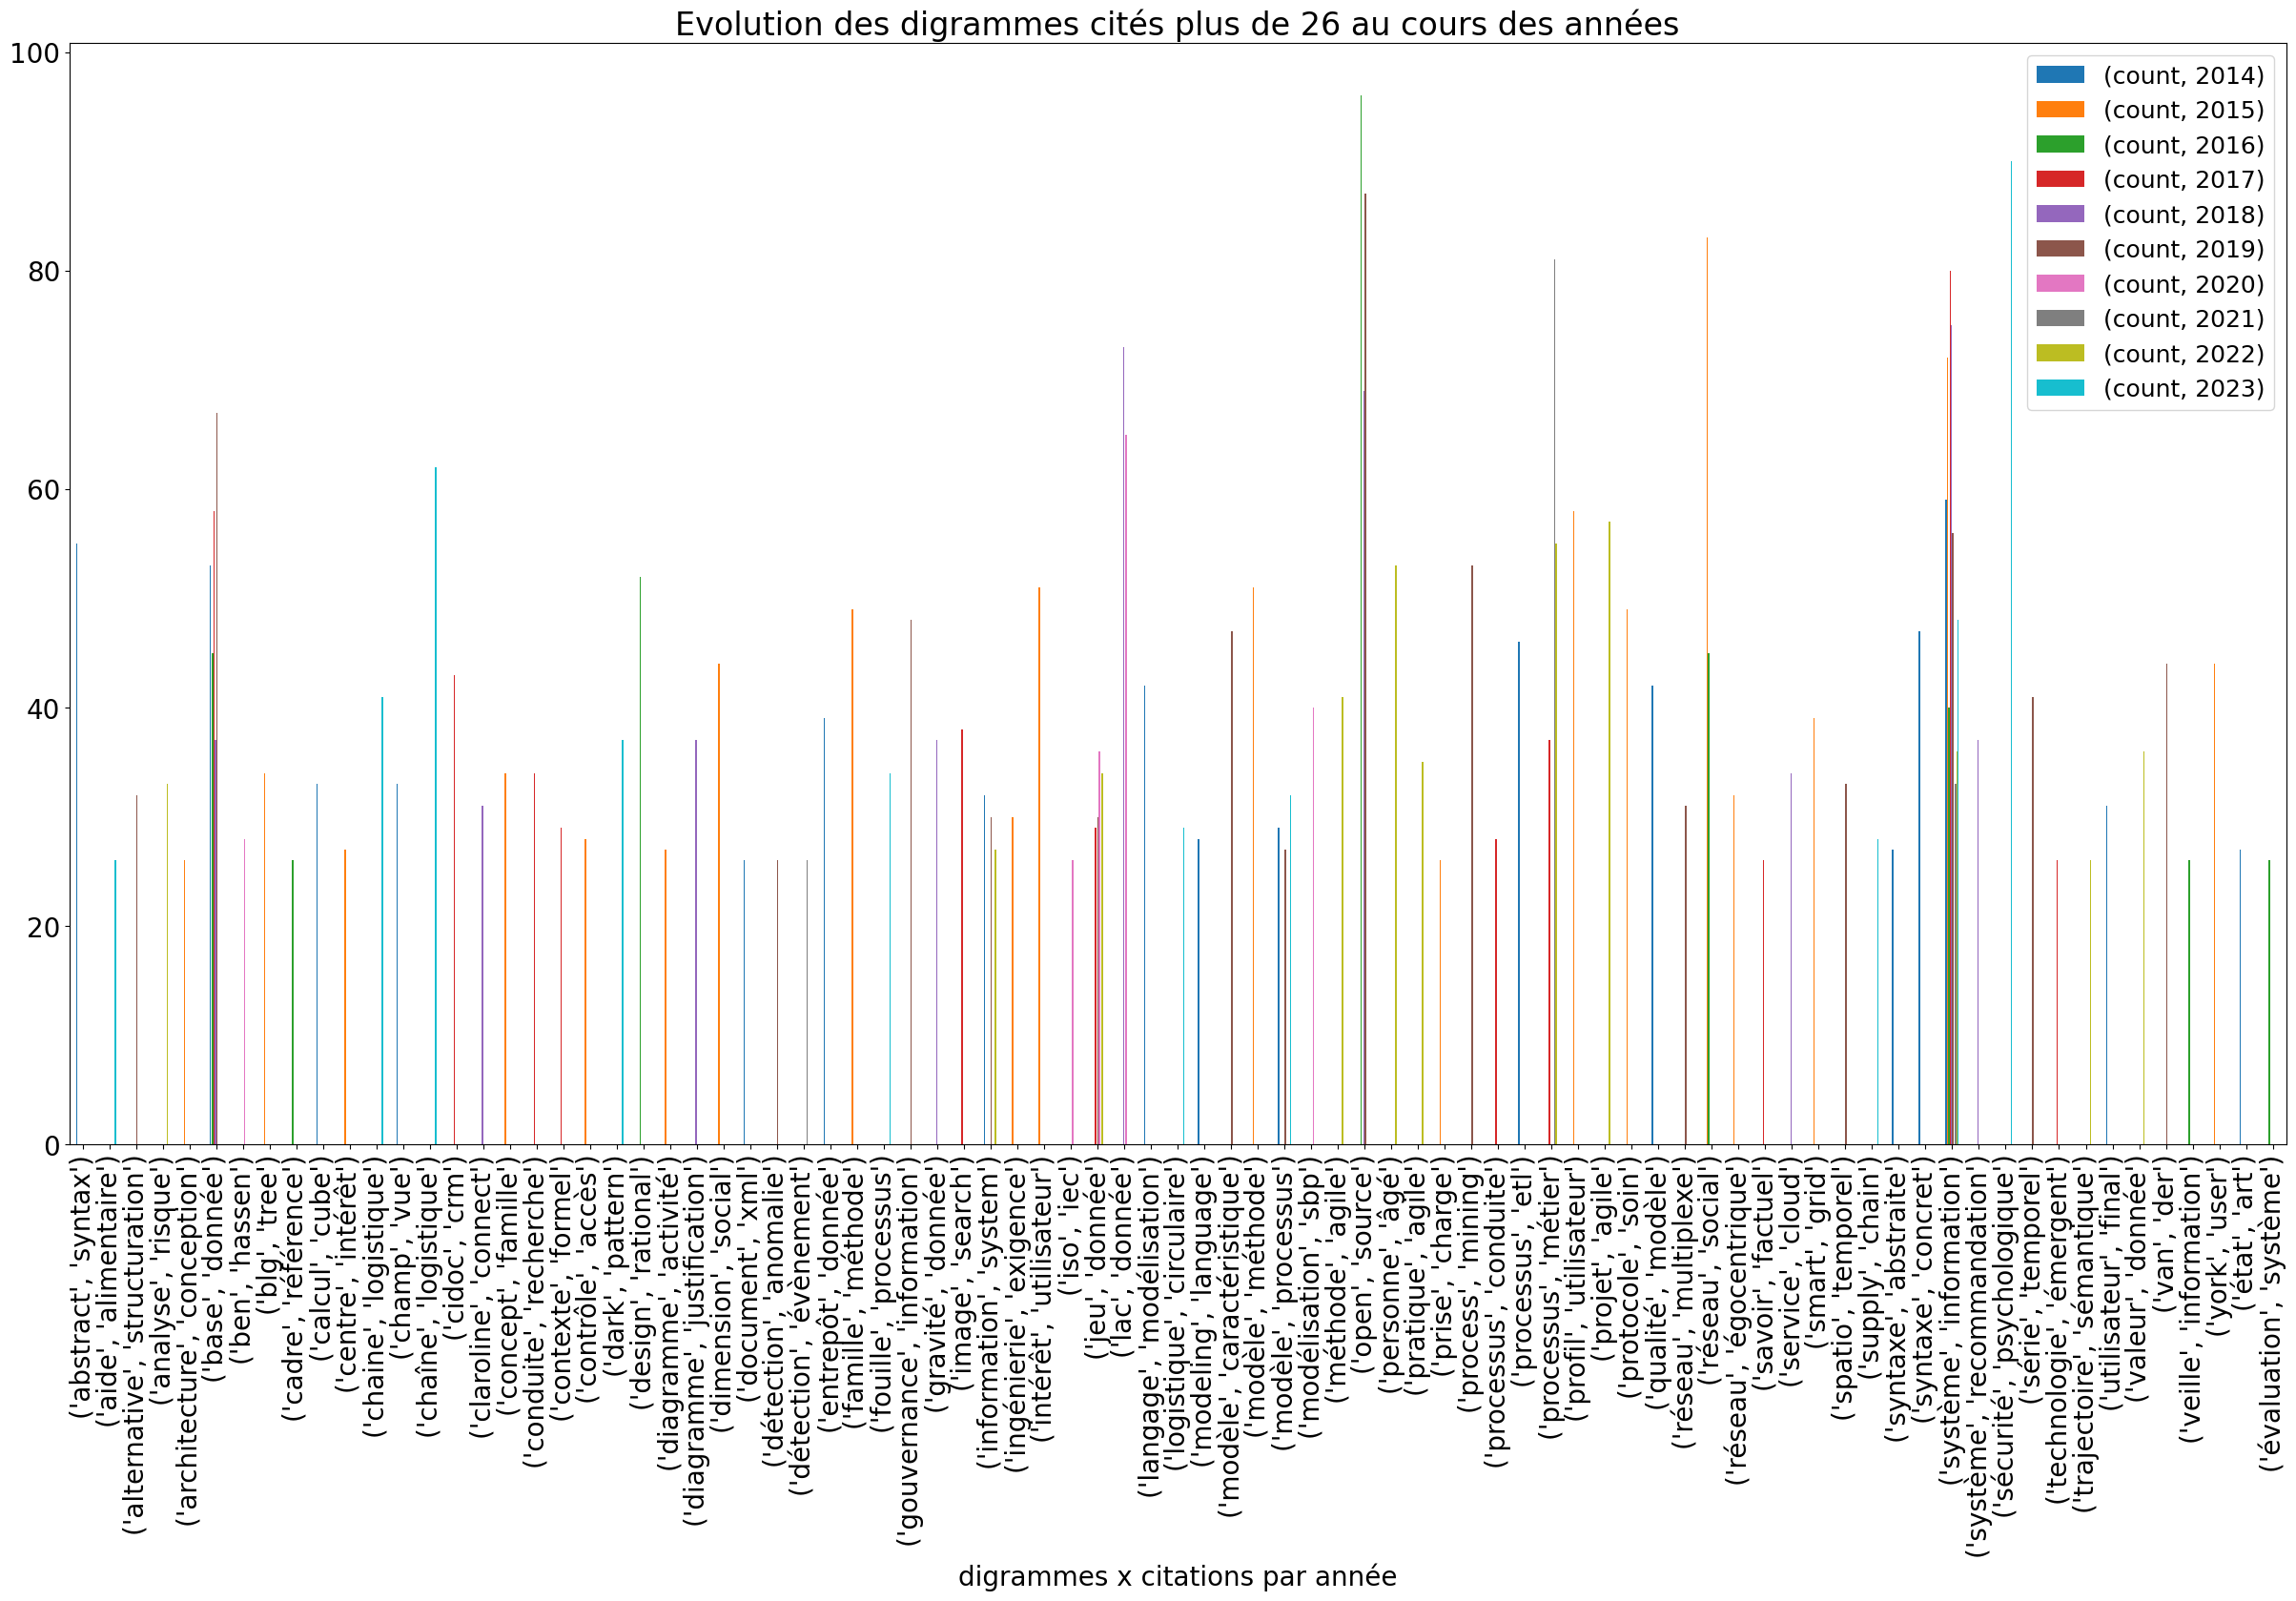

In [38]:
sumngram.unstack().plot(kind='bar', figsize=(30,15), fontsize=20)
plt.title('Evolution des digrammes cités plus de {} au cours des années'.format(bquartsup), 
          fontsize=24)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=18 )
plt.xlabel('digrammes x citations par année', fontsize=20)

Même chose pour les moins fréquents. 

In [39]:
sumngram = ngramcount.query('count < {}'.format(int(bquartinf))).groupby(by=['n-grams', 'year']).sum()
sumngram.sort_values(by=['count', 'n-grams'], ascending=False, inplace=True)
sumngram

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2788318741.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumngram = ngramcount.query('count < {}'.format(int(bquartinf))).groupby(by=['n-grams', 'year']).sum()


count
n-grams                         year       
('zone', 'interne')             2021     14
('temps', 'réel')               2020     14
('système', 'nosql')            2018     14
('schéma', 'logique')           2016     14
('recueil', 'consentement')     2023     14
...                                     ...
('idf', 'dataset')              2021     10
('end', 'end')                  2021     10
('donnée', 'issu')              2021     10
('dataset', 'idf')              2021     10
('architecture', 'transformer') 2021     10

[117 rows x 1 columns]

In [40]:
ngrams = len(sumngram.index.get_level_values('n-grams').unique())
print('nb n-grams unique', ngrams)
sumngram.describe()

nb n-grams unique 113


count
count  117.000000
mean    12.401709
std      1.203872
min     10.000000
25%     12.000000
50%     13.000000
75%     13.000000
max     14.000000

Text(0.5, 0, 'digrammes x citations par année')

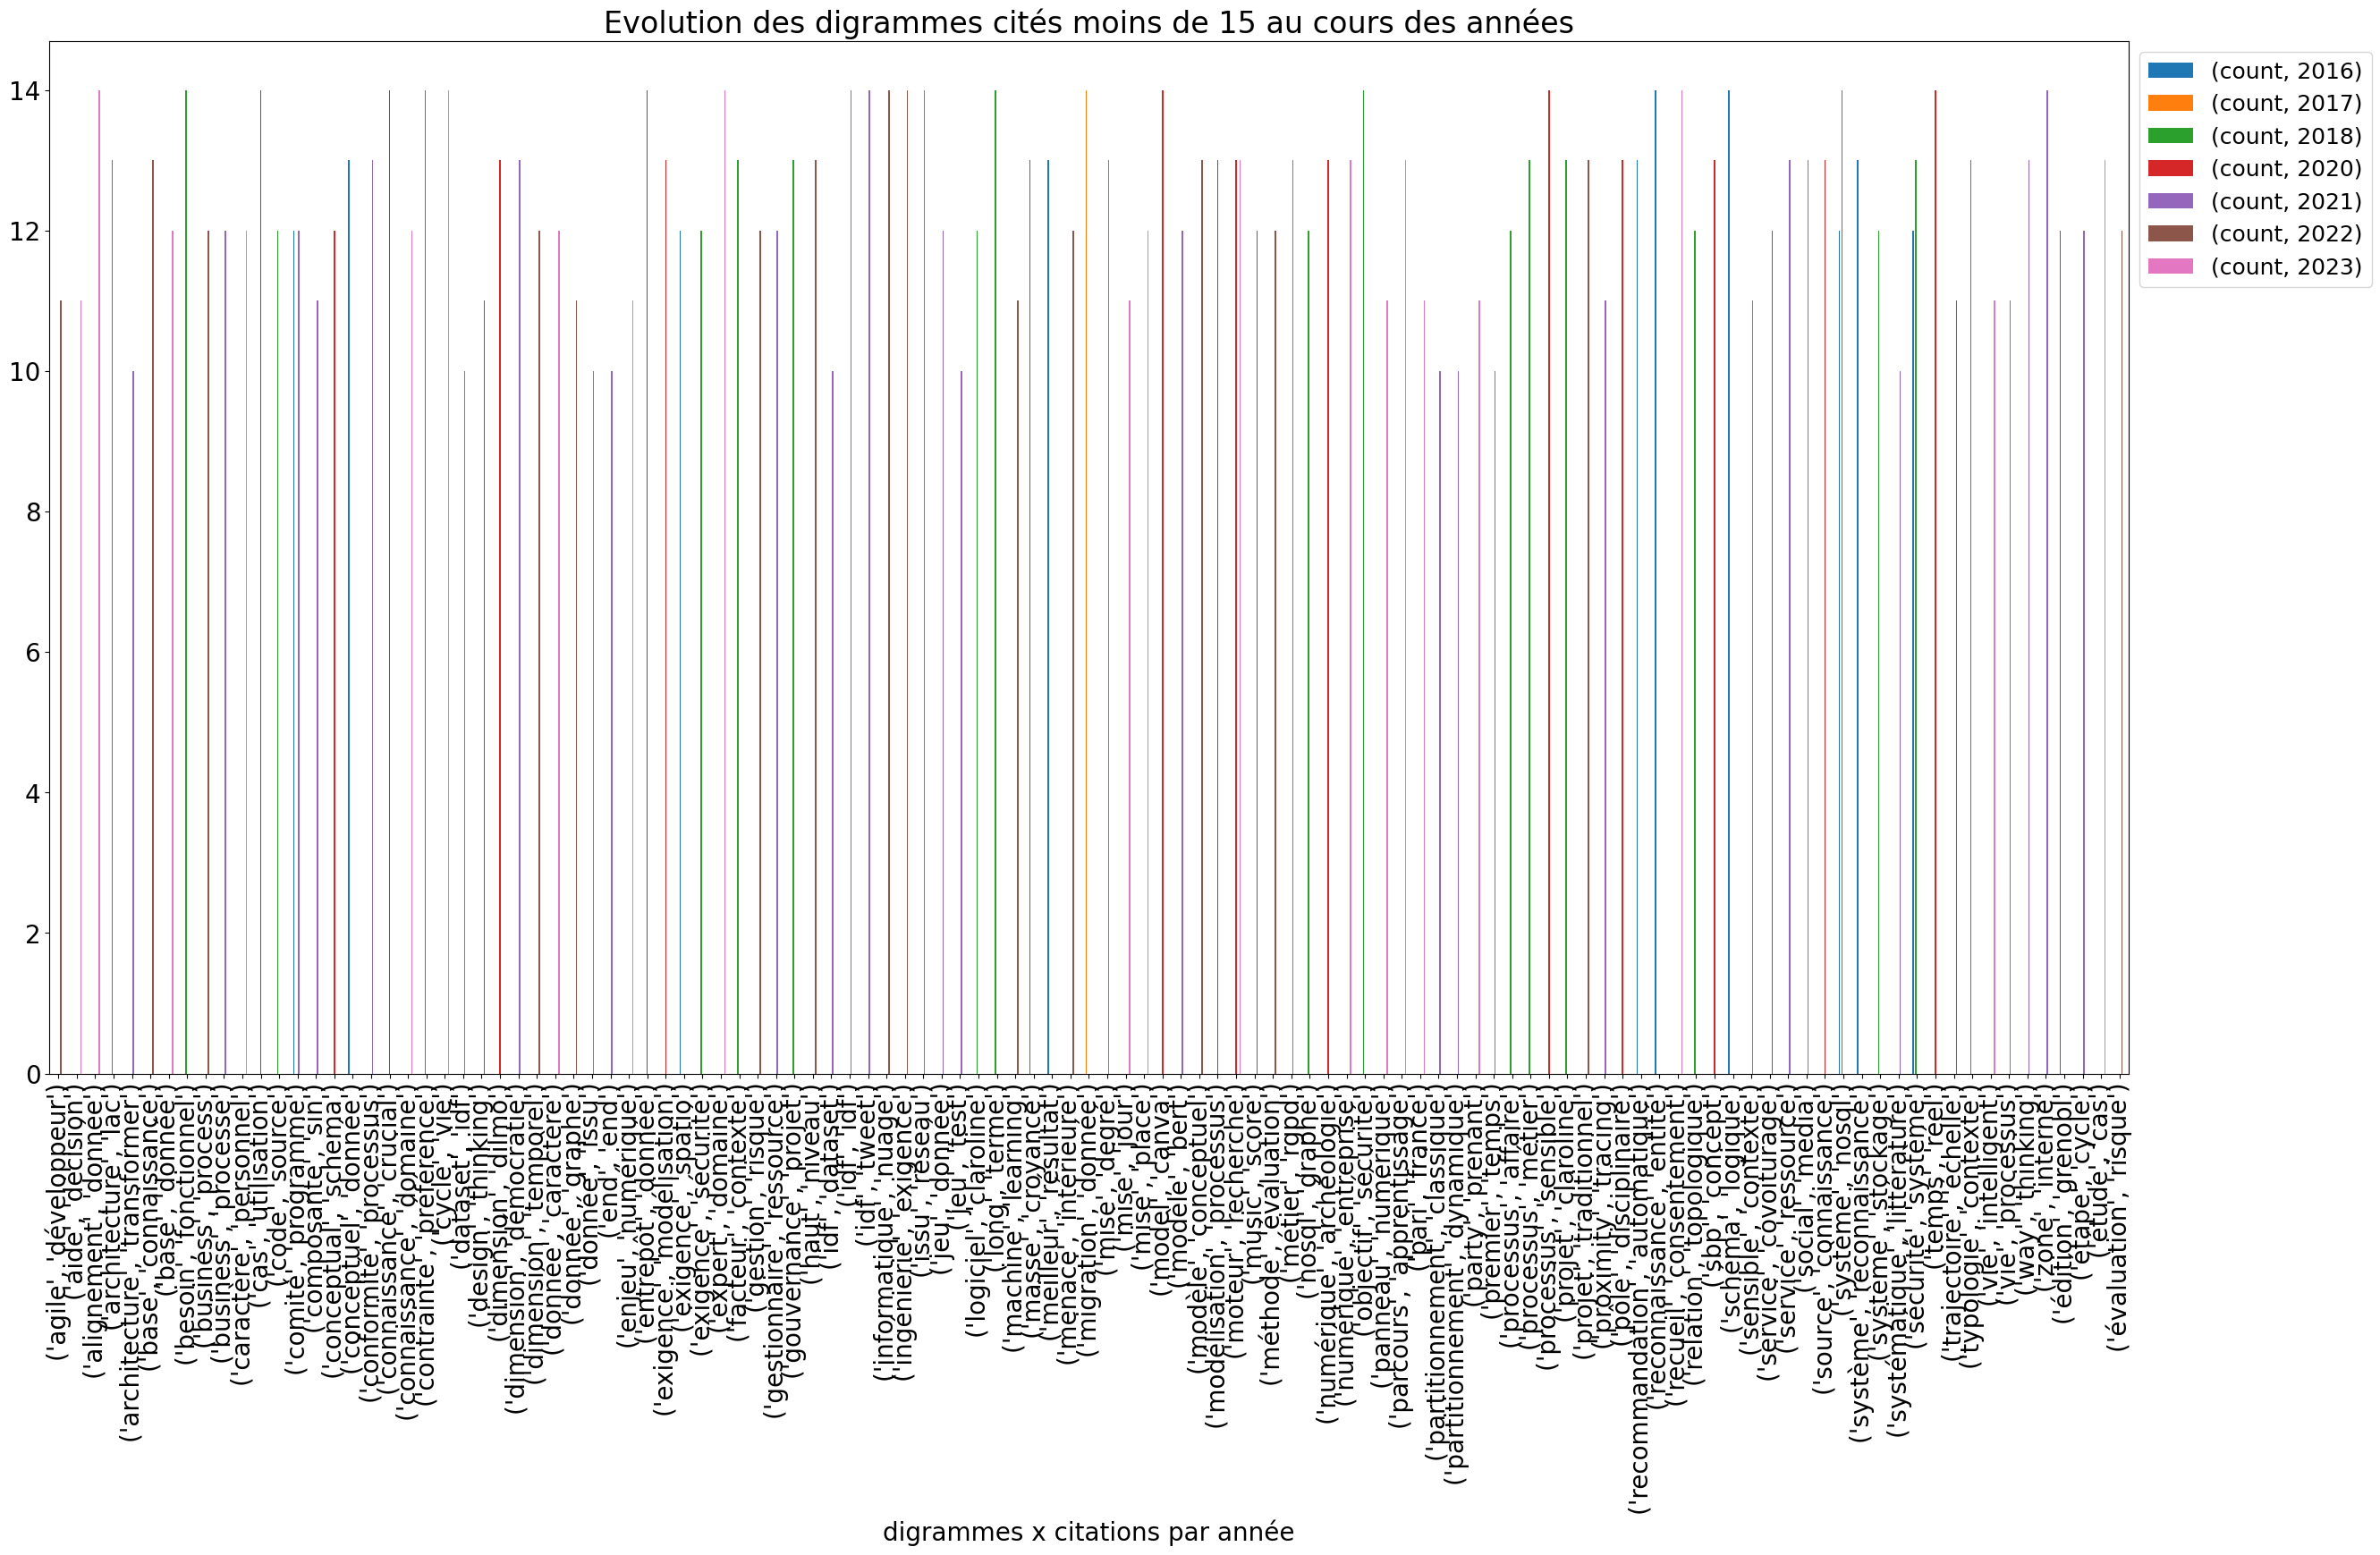

In [41]:
sumngram.unstack().plot(kind='bar', figsize=(30,15), fontsize=20)
plt.title('Evolution des digrammes cités moins de {} au cours des années'.format(bquartinf), 
          fontsize=24)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=18 )
plt.xlabel('digrammes x citations par année', fontsize=20)

difficle de voir la variation, on va donc se concentrer sur les 15 plus cités toute année confondue. 

In [42]:
seuilngram = 15

listengrams = list(ngramplusfreq.head(seuilngram).index.unique())
listengrams

["('système', 'information')",
 "('base', 'donnée')",
 "('open', 'source')",
 "('processus', 'métier')",
 "('information', 'system')",
 "('réseau', 'social')",
 "('jeu', 'donnée')",
 "('lac', 'donnée')",
 "('modèle', 'processus')",
 "('état', 'art')",
 "('sécurité', 'psychologique')",
 "('process', 'mining')",
 "('langage', 'modélisation')",
 "('chaîne', 'logistique')",
 "('système', 'recommandation')"]

In [43]:
len(ngramcount['n-grams'].unique())

399

In [44]:
ngram_reduit = ngramcount [ ngramcount['n-grams'].isin(listengrams)]

print (len(ngram_reduit['n-grams'].unique()))

ngram_reduit


15


n-grams  count  \
100             ('open', 'source')     96   
450  ('sécurité', 'psychologique')     90   
250             ('open', 'source')     87   
50            ('réseau', 'social')     83   
350        ('processus', 'métier')     81   
..                             ...    ...   
332             ('open', 'source')     15   
133        ('modèle', 'processus')     15   
241        ('processus', 'métier')     13   
490             ('base', 'donnée')     12   
381              ('jeu', 'donnée')     12   

                                              source  year  
100  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf  2016  
450  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
250  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
50   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
350  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
..                                               ...   ...  
332  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf  2020  
133  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf  2016  
241  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018  
490  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
381  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  

[72 rows x 4 columns]

In [45]:
sumngram = ngram_reduit.groupby(by=['n-grams', 'year']).sum()
#sumngram.sort_values(by=['count', 'n-grams'], ascending=False)#, inplace=True)
#sumngram

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/3087567500.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumngram = ngram_reduit.groupby(by=['n-grams', 'year']).sum()


Text(0.5, 0, 'digrammes x citations par année')

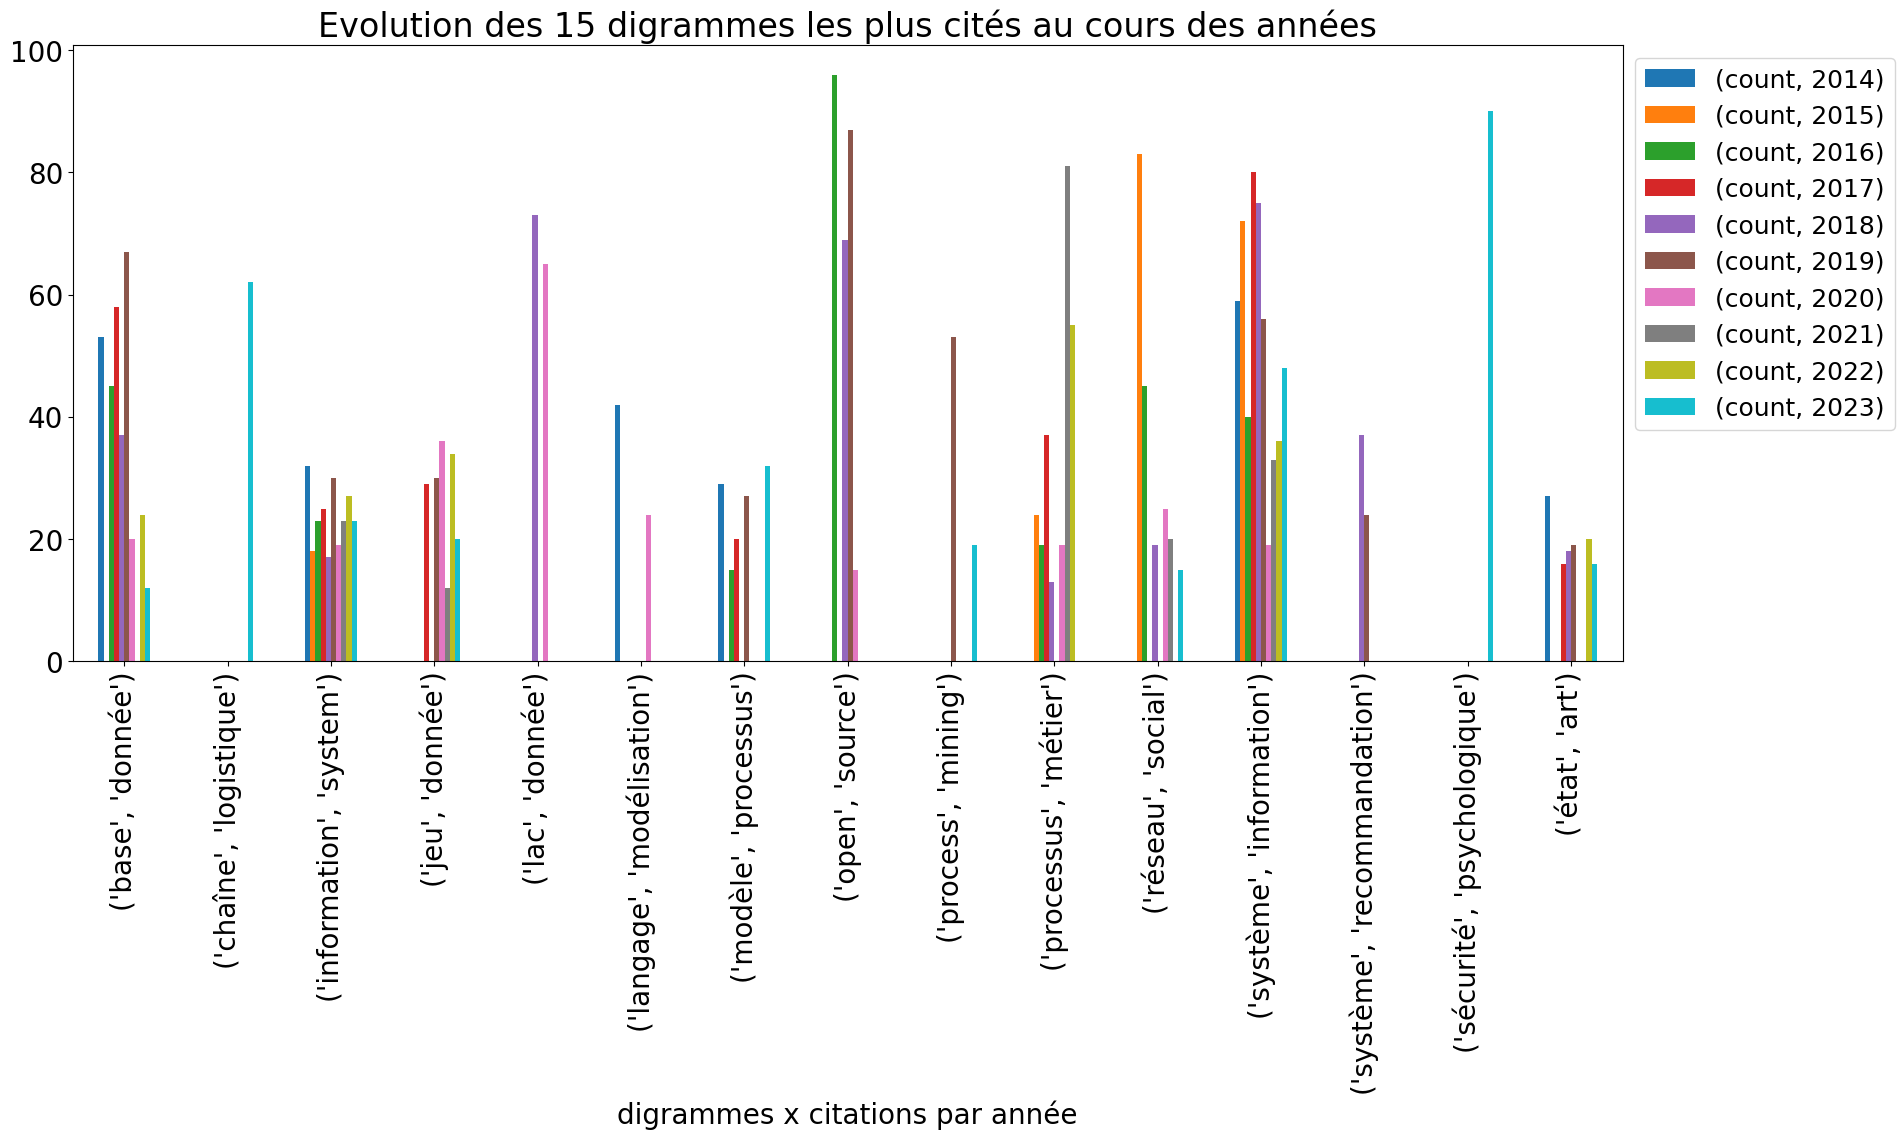

In [46]:
sumngram.unstack().plot(kind='bar', figsize=(20,8), fontsize=20)
plt.title('Evolution des 15 digrammes les plus cités au cours des années', 
          fontsize=24)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=18 )
plt.xlabel('digrammes x citations par année', fontsize=20)

Maintenant les 15 les moins cités

In [47]:
ngram_reduit = ngramcount [ ngramcount['n-grams'].isin(list(ngramplusfreq.tail(seuilngram).index.unique()))]
ngram_reduit 

n-grams  count  \
494            ('vie', 'intelligent')     11   
499            ('enjeu', 'numérique')     11   
445              ('donnée', 'graphe')     11   
448            ('design', 'thinking')     11   
387          ('proximity', 'tracing')     11   
390              ('premier', 'temps')     10   
391                    ('end', 'end')     10   
392  ('partitionnement', 'dynamique')     10   
393  ('partitionnement', 'classique')     10   
394   ('architecture', 'transformer')     10   
395                ('donnée', 'issu')     10   
396                   ('jeu', 'test')     10   
397                ('idf', 'dataset')     10   
398                ('dataset', 'idf')     10   
399   ('systématique', 'littérature')     10   

                                              source  year  
494  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
499  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
445  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022  
448  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022  
387  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
390  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
391  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
392  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
393  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
394  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
395  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
396  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
397  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
398  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
399  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021

In [48]:
sumngram = ngram_reduit.groupby(by=['n-grams', 'year']).sum()
sumngram

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1615406684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumngram = ngram_reduit.groupby(by=['n-grams', 'year']).sum()


count
n-grams                          year       
('architecture', 'transformer')  2021     10
('dataset', 'idf')               2021     10
('design', 'thinking')           2022     11
('donnée', 'graphe')             2022     11
('donnée', 'issu')               2021     10
('end', 'end')                   2021     10
('enjeu', 'numérique')           2023     11
('idf', 'dataset')               2021     10
('jeu', 'test')                  2021     10
('partitionnement', 'classique') 2021     10
('partitionnement', 'dynamique') 2021     10
('premier', 'temps')             2021     10
('proximity', 'tracing')         2021     11
('systématique', 'littérature')  2021     10
('vie', 'intelligent')           2023     11

Text(0.5, 0, 'digrammes x citations par année')

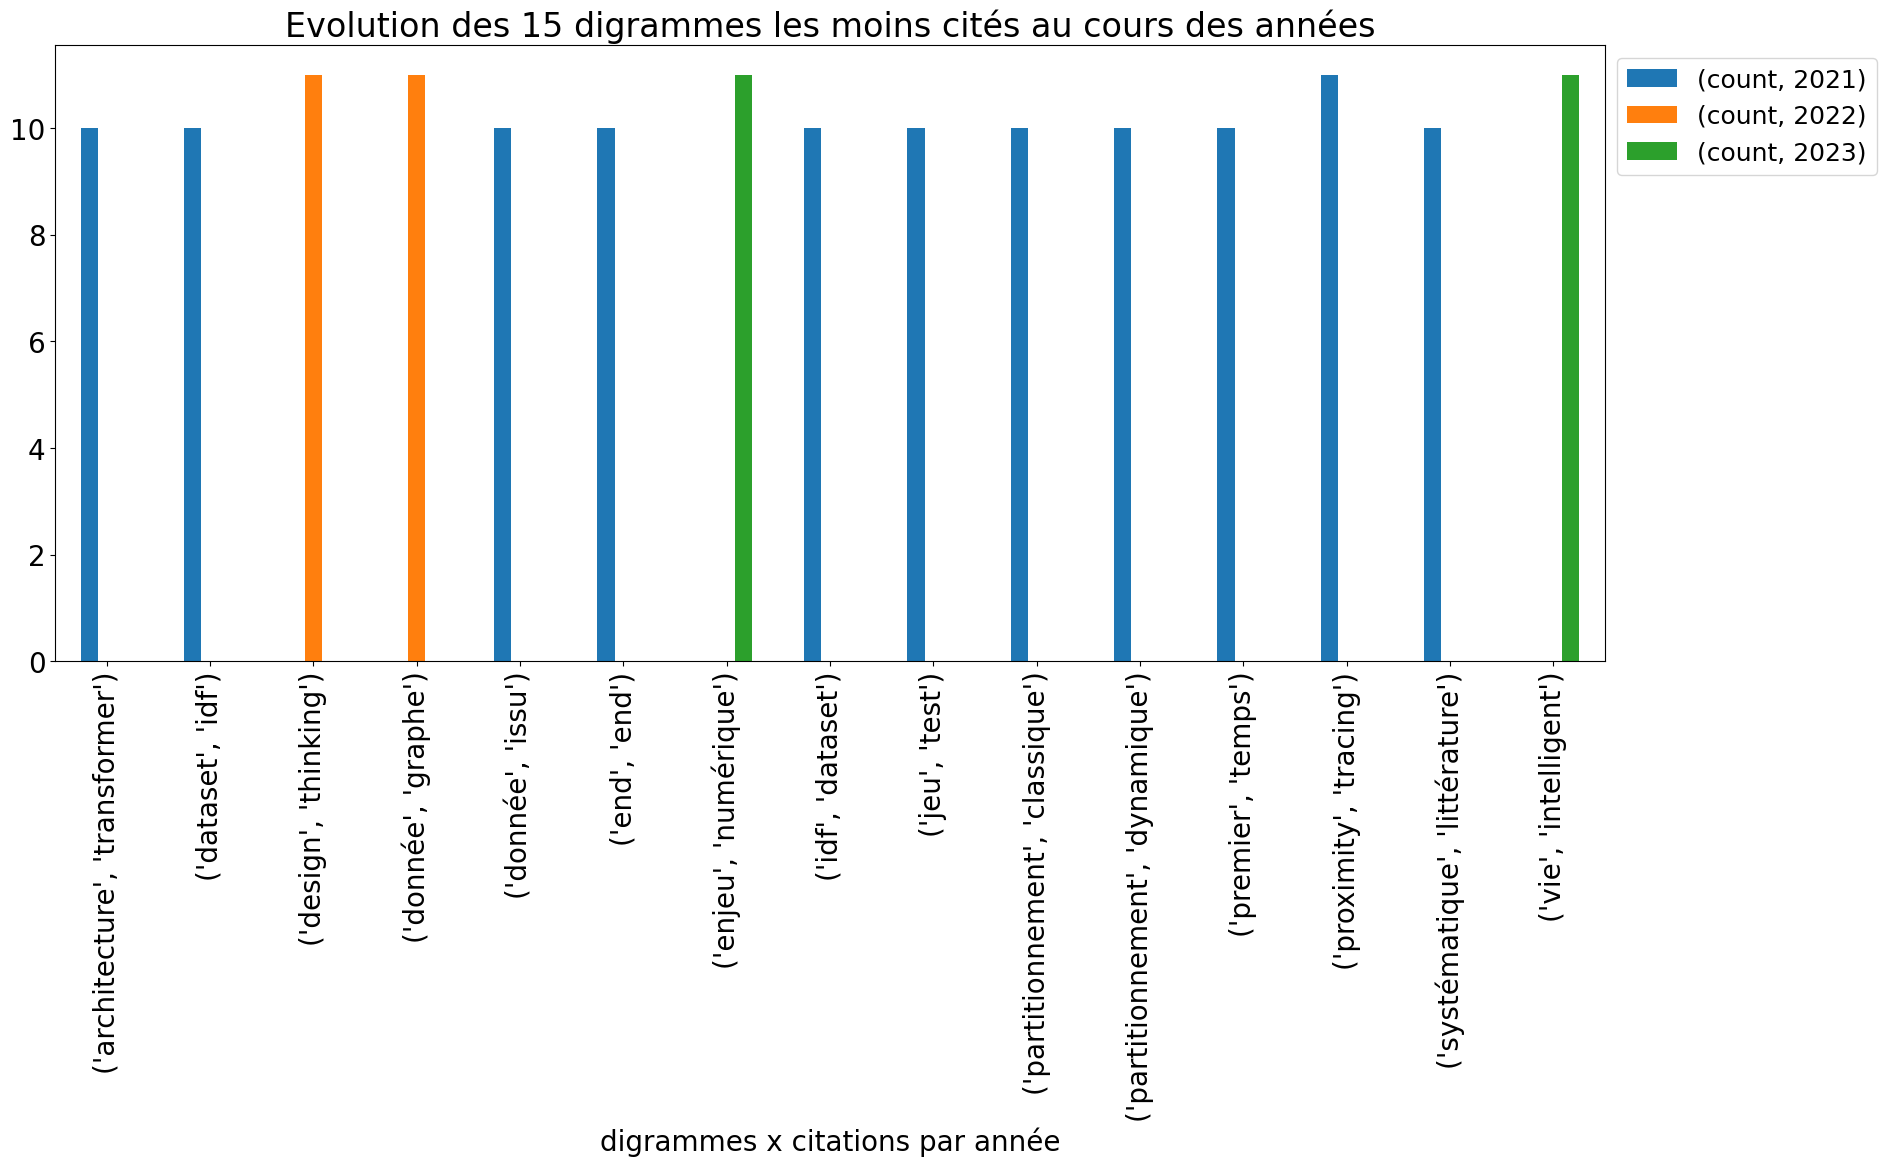

In [49]:
sumngram.unstack().plot(kind='bar', figsize=(20,8), fontsize=20)
plt.title('Evolution des 15 digrammes les moins cités au cours des années', 
          fontsize=24)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=18 )
plt.xlabel('digrammes x citations par année', fontsize=20)

ceux avant et après 2018.

In [50]:
newones = list(ngramcount.query('year > 2018')['n-grams']) 
df_gno = ngramcount [ ~ngramcount['n-grams'].isin(newones)].groupby(by=['n-grams', 'year']).sum()
df_gno.query('count > 30').describe()

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1486014492.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gno = ngramcount [ ~ngramcount['n-grams'].isin(newones)].groupby(by=['n-grams', 'year']).sum()


count
count  26.000000
mean   41.461538
std     8.154659
min    31.000000
25%    34.000000
50%    40.500000
75%    48.500000
max    58.000000

Text(0.5, 0, 'digrammes x citations par année')

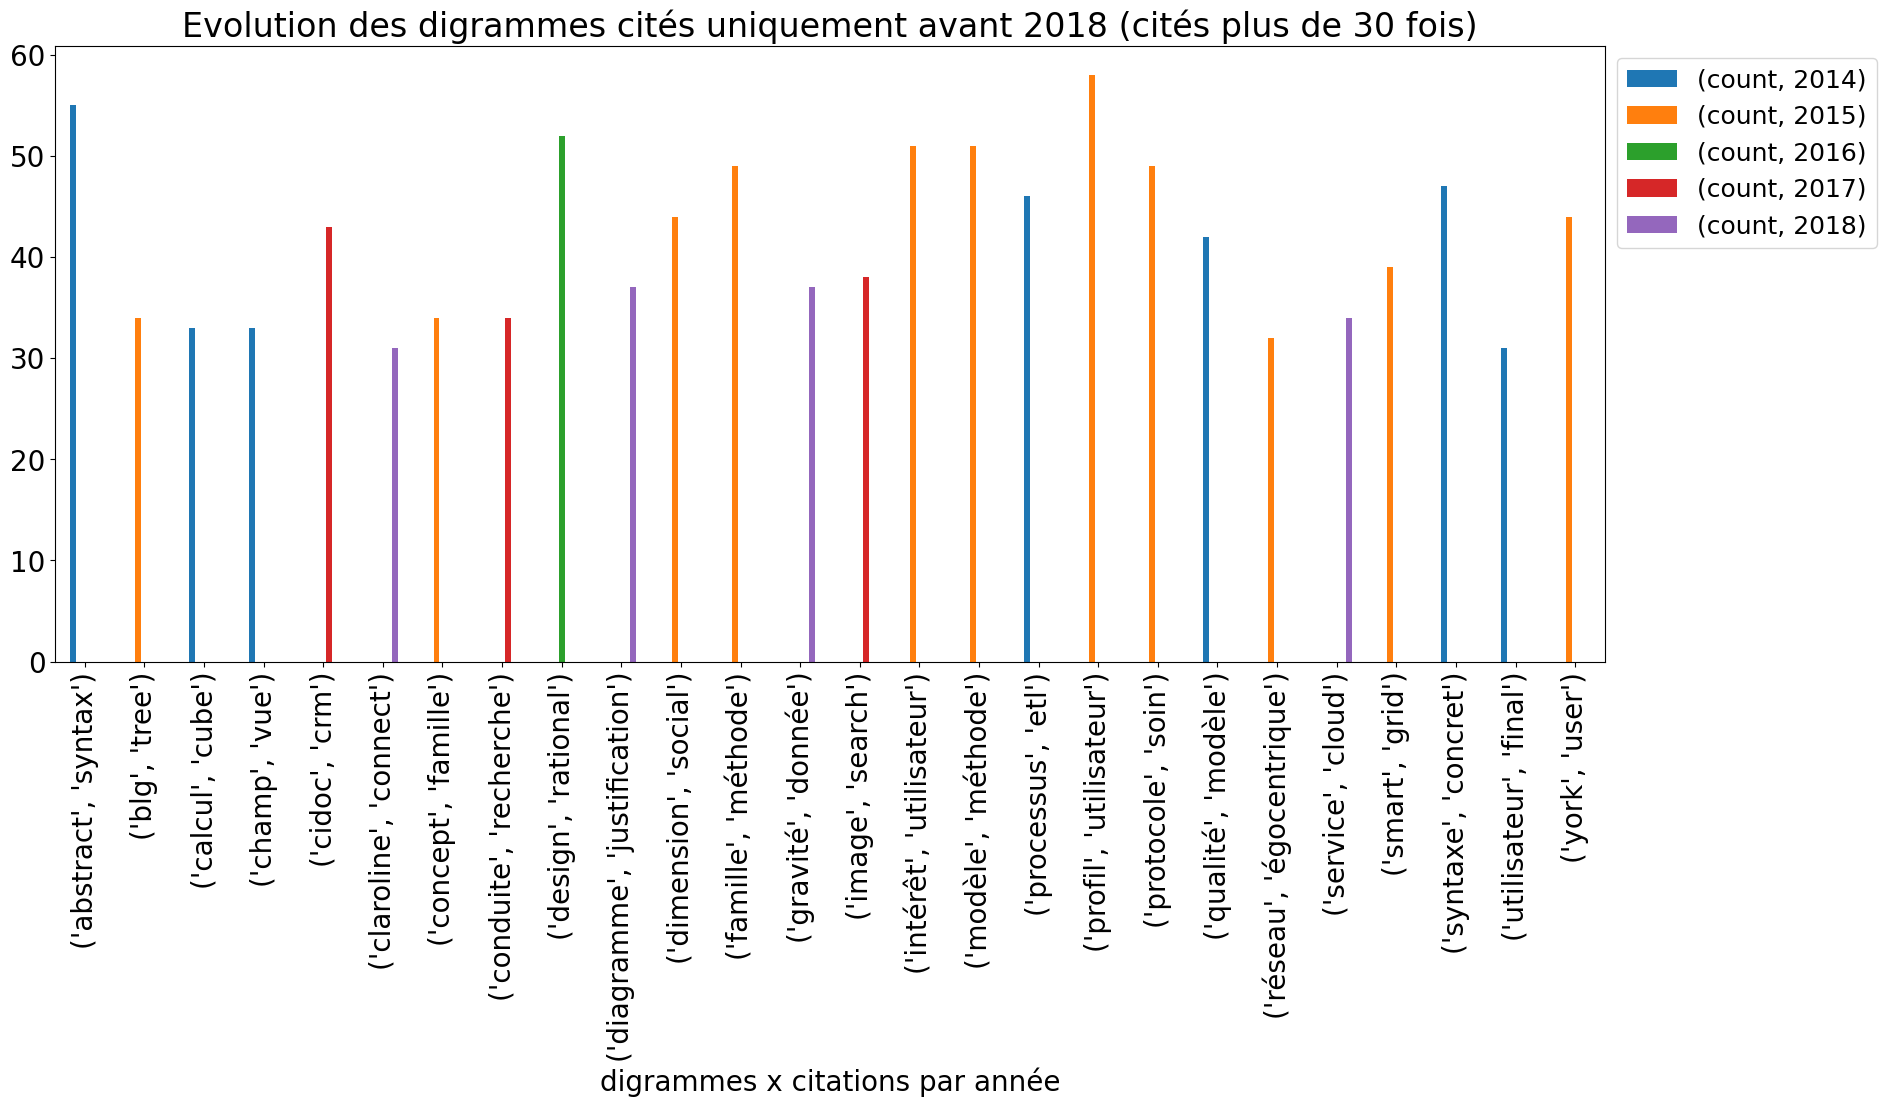

In [51]:
df_gno.query('count > 30').unstack().plot(kind='bar', figsize=(20,8), fontsize=20)
plt.title('Evolution des digrammes cités uniquement avant 2018 (cités plus de 30 fois)', 
          fontsize=24)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=18 )
plt.xlabel('digrammes x citations par année', fontsize=20)

bah, en fait, non... si on ne limite pas le nombre, ça fait trop. 

In [52]:
oldones = list(ngramcount.query('year <= 2018')['n-grams']) 
df_gno = ngramcount [ ~ngramcount['n-grams'].isin(oldones)].groupby(by=['n-grams', 'year']).sum()
df_gno.query('count > 30').describe()

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1256665498.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gno = ngramcount [ ~ngramcount['n-grams'].isin(oldones)].groupby(by=['n-grams', 'year']).sum()


count
count  19.000000
mean   45.000000
std    14.039626
min    31.000000
25%    35.500000
50%    41.000000
75%    50.500000
max    90.000000

Text(0.5, 0, 'digrammes x citations par année')

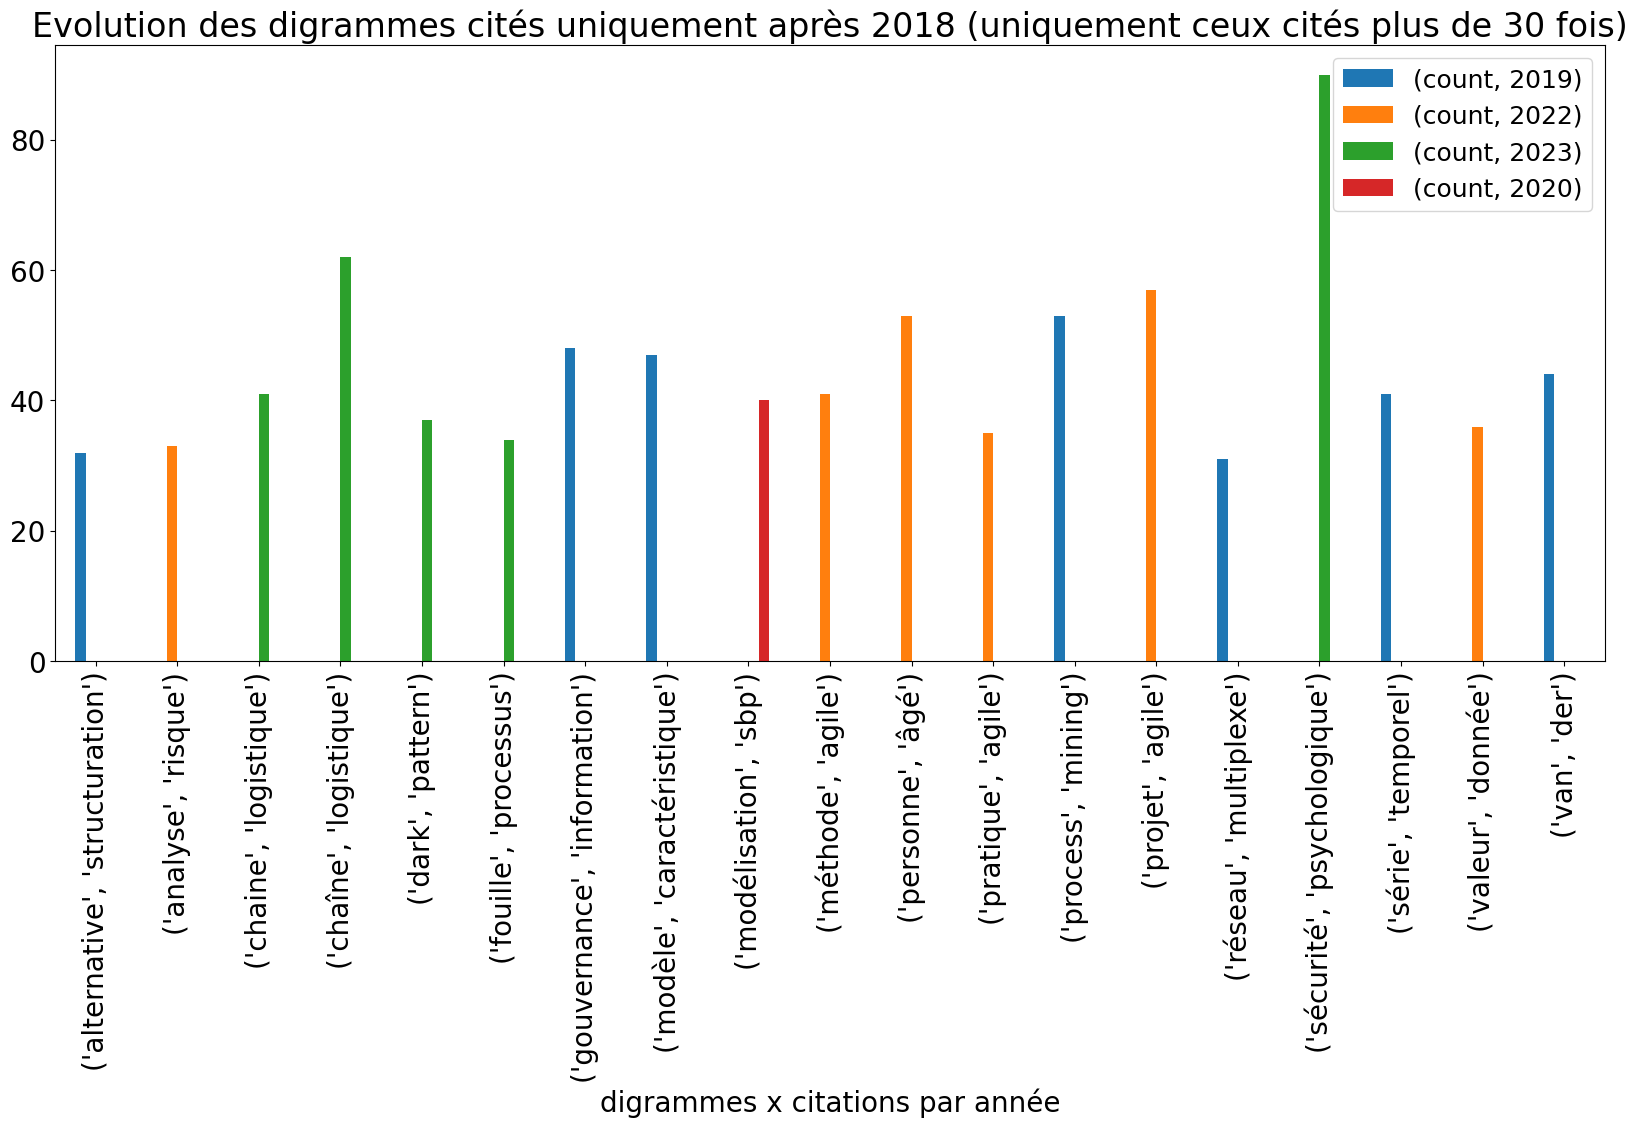

In [53]:
df_gno.query('count > 30').unstack().plot(kind='bar', figsize=(20,8), fontsize=20)
plt.title('Evolution des digrammes cités uniquement après 2018 (uniquement ceux cités plus de 30 fois)', 
          fontsize=24)
plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=18 )
plt.xlabel('digrammes x citations par année', fontsize=20)

# TENTATIVA

quelques essaies (pas franchement réussis) d'analyse sur les données. 


In [54]:
df = wordcount.query('count > {}'.format(Aquartsup)).sort_values(by=['word', 'year'])
print(len(df['word'].unique()))
print(len(df['year'].unique()))

54
10


In [55]:
df.drop(columns=['source'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 402 to 265
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    124 non-null    object
 1   count   124 non-null    int64 
 2   year    124 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ KB


/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1932791279.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp_df in df.groupby(['word']):


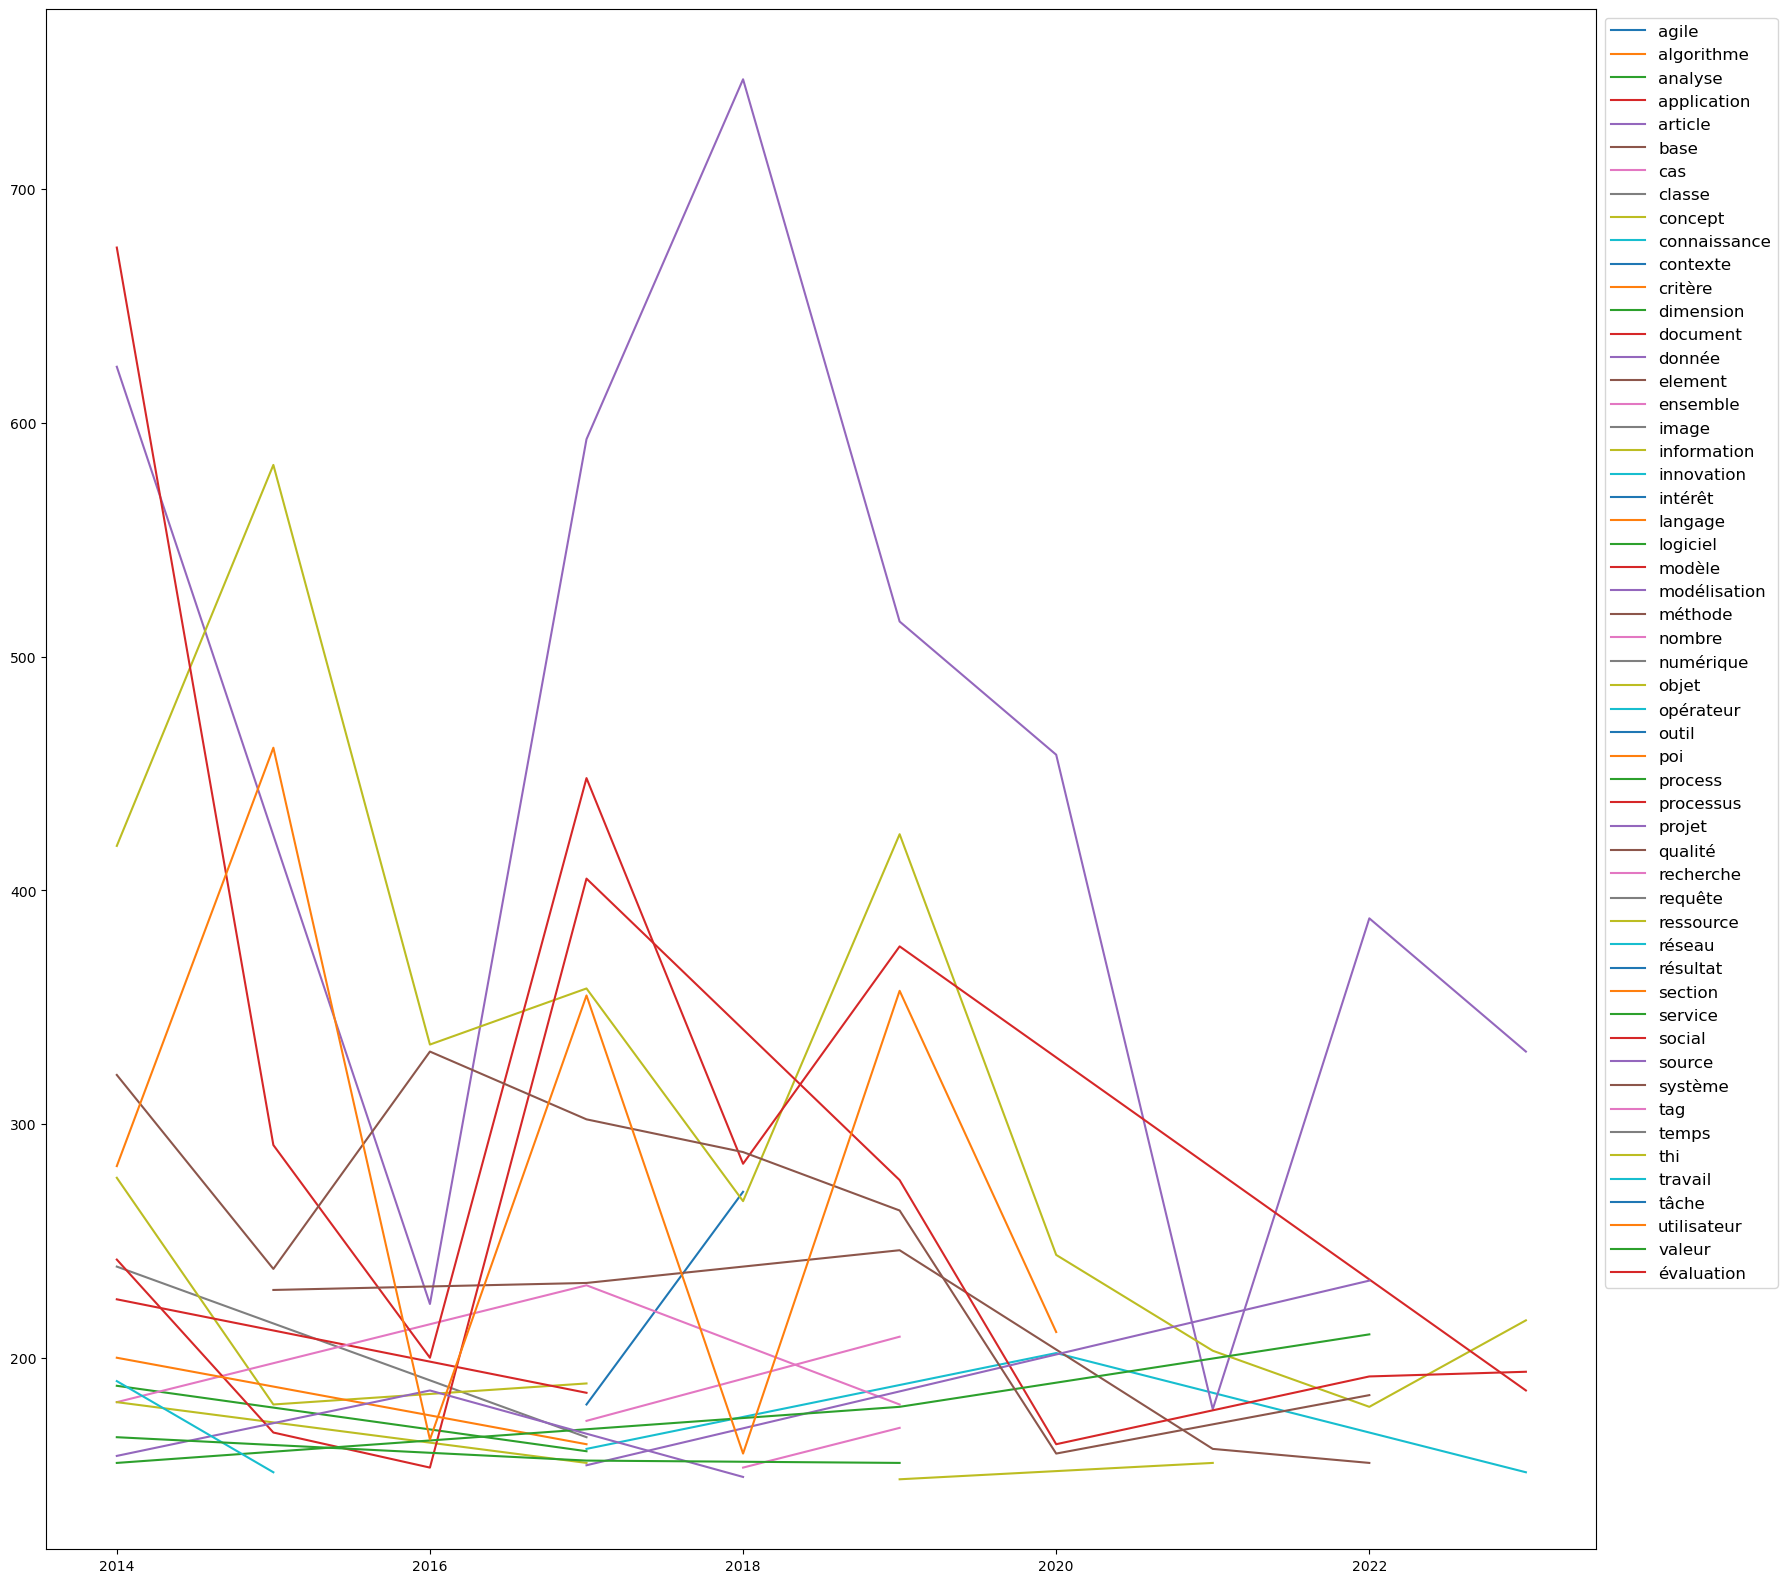

In [56]:
#df2 = df.groupby('word')

#fig, ax = plt.subplots()
plt.figure(figsize=(20,20))

for key, grp_df in df.groupby(['word']):
    #ax = grp.plot(ax=ax, kind='line', x='year', y='count', label=key)
    plt.plot(grp_df['year'], grp_df['count'], label=key)
    
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.show()


tentative avec mots plus fréquentes 

In [57]:
df2 = wordcount[ wordcount['word'].isin(list(motsplusfreq.head(10).index.unique()))]
print(len(df2['word'].unique()))
print(len(df2['year'].unique())) 

10
10


In [58]:
df2.sort_values(by=['year'], inplace=True)
df2

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1846192687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by=['year'], inplace=True)


word  count                                           source  year
8      processus    242  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
0         modèle    675  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
1         donnée    624  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
5    utilisateur    282  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
4    application    296  ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014
..           ...    ...                                              ...   ...
451  information    216  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023
450       donnée    331  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023
462          cas    119  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023
467      méthode    107  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023
459      travail    128  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023

[95 rows x 4 columns]

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1487627801.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp_df in df2.groupby(['word']):


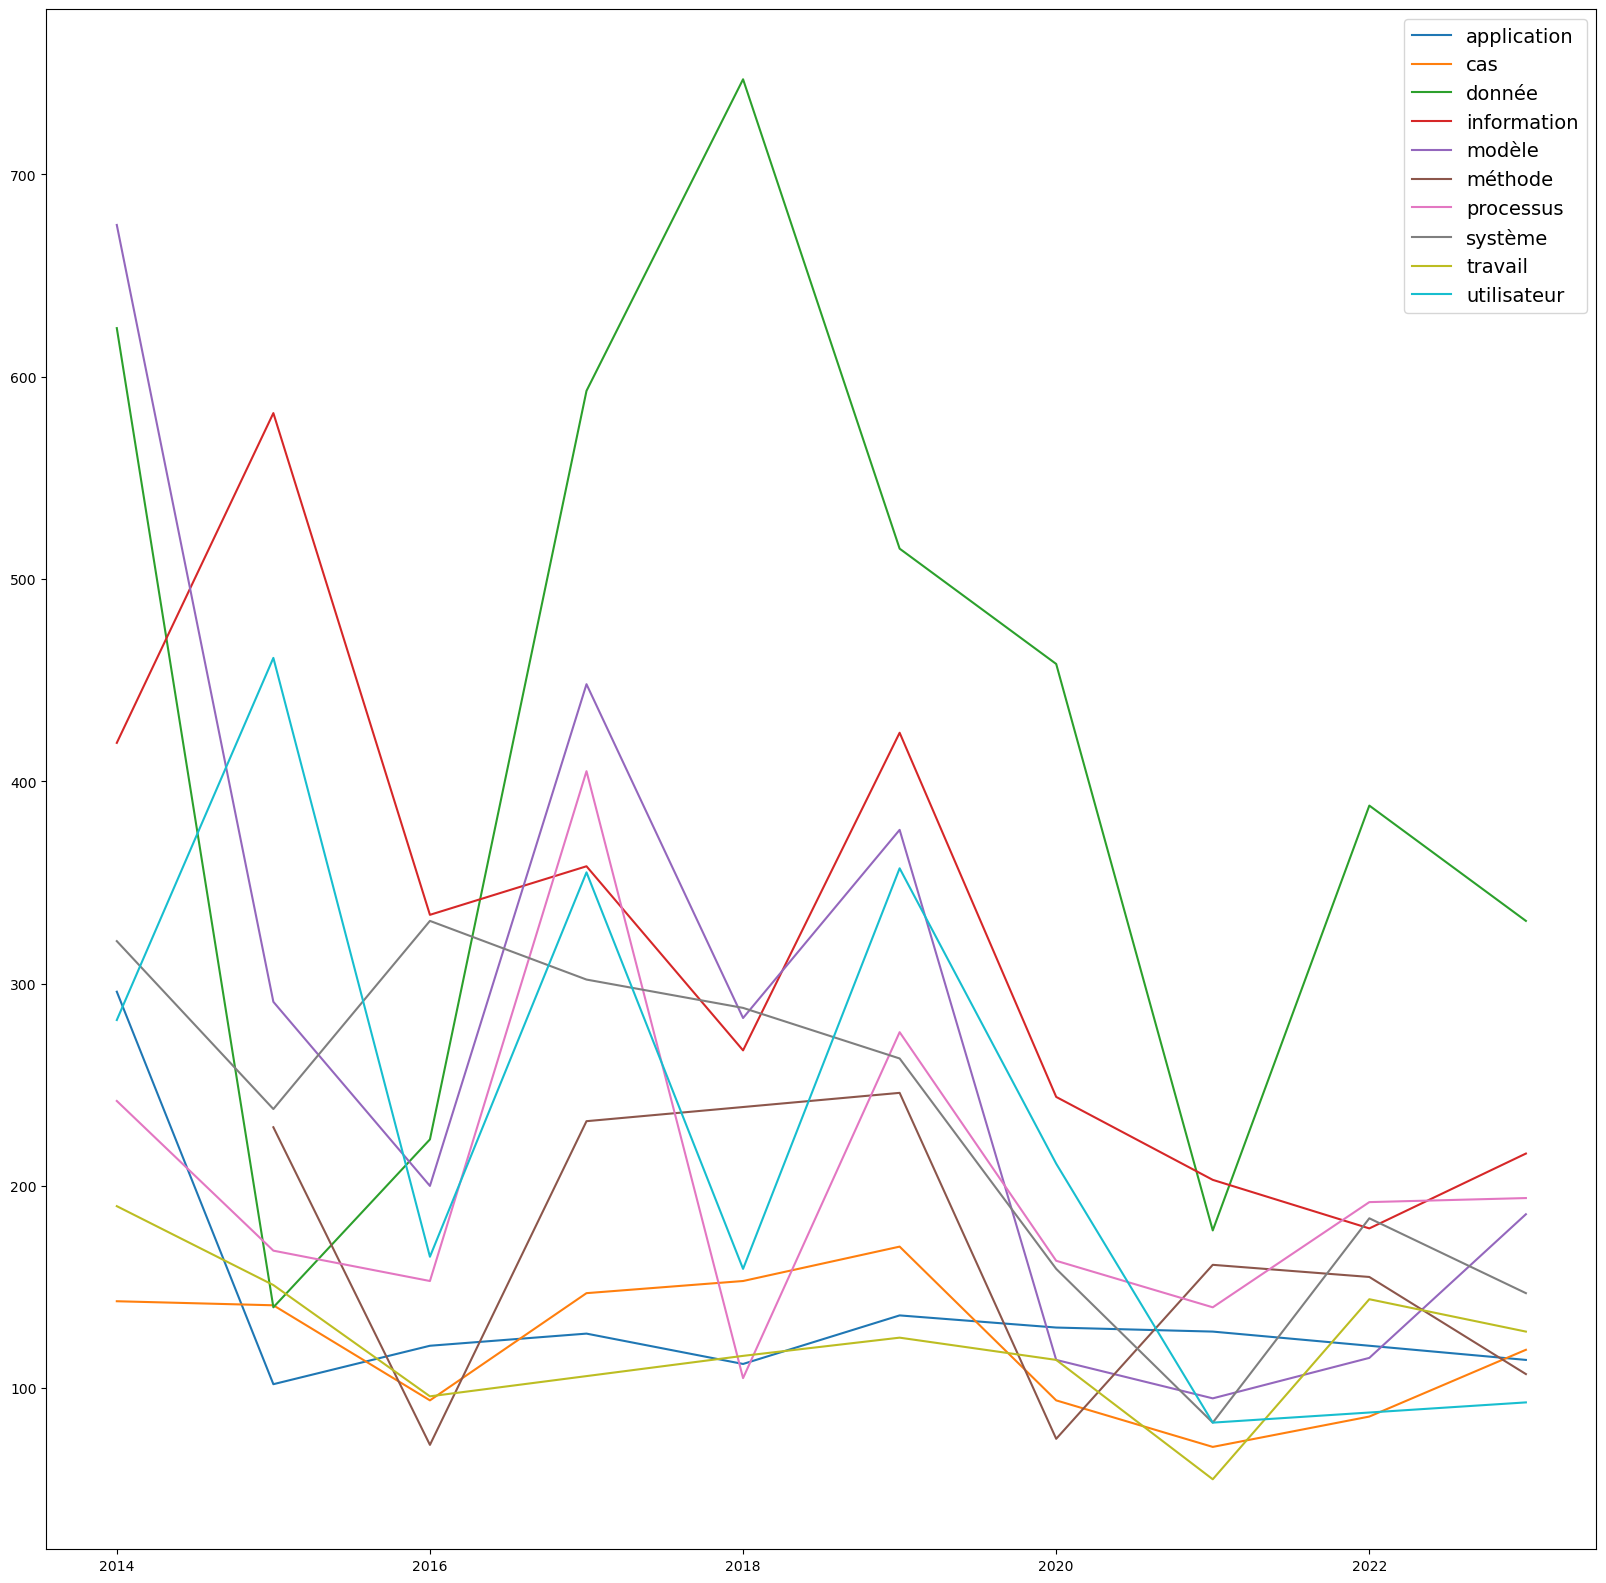

In [59]:
plt.figure(figsize=(20,20))

for key, grp_df in df2.groupby(['word']):
    #ax = grp.plot(ax=ax, kind='line', x='year', y='count', label=key)
    plt.plot(grp_df['year'], grp_df['count'], label=key)
    
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=14)
plt.show()

# Tracer quelques mots en particulier

on essaie de voir l'évolution de quelques mots en particulier 

In [60]:
viw = ['service', 'classe', 'objet', 'gouvernance', 'connaissance']
#'etl', 'rgpd', 'blockchain', 
markers = ['o', 's', 'x', 'D', 'p', 'v', 'H', '1']

dfvim = wordcount[ wordcount['word'].isin(viw)]
dfvim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 9 to 87
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    15 non-null     object
 1   count   15 non-null     int64 
 2   source  15 non-null     object
 3   year    15 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 600.0+ bytes


/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/660729490.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp_df in dfvim.sort_values(by=['year']).groupby(['word']):


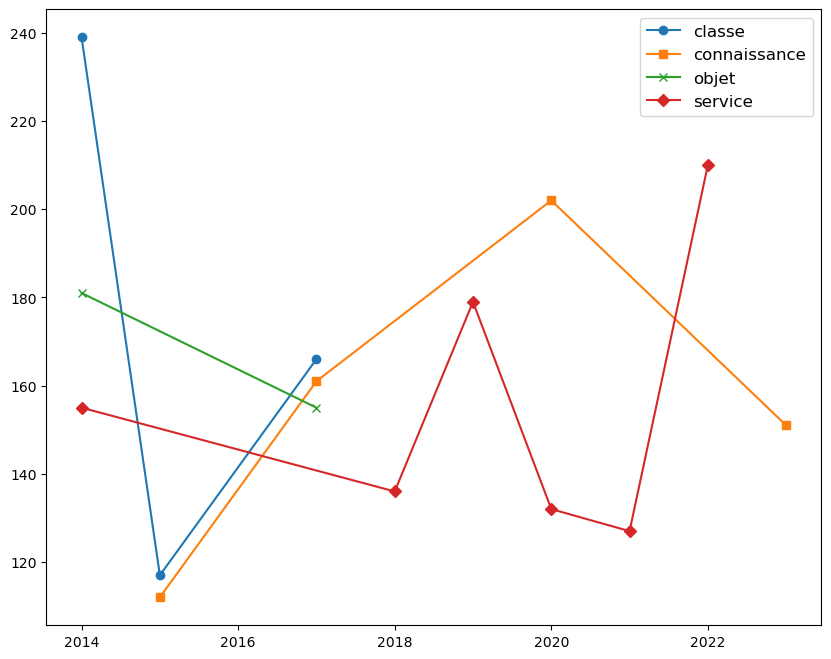

In [61]:
plt.figure(figsize=(10,8))
i = 0
for key, grp_df in dfvim.sort_values(by=['year']).groupby(['word']):
    #ax = grp.plot(ax=ax, kind='line', x='year', y='count', label=key)
    plt.plot(grp_df['year'], grp_df['count'], label=key, marker=markers[i])
    i+=1
    
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.show()


In [62]:
viw = ['processus', 'modèle', 'méthode', 'utilisateur'] 
markers = ['o', 's', 'x', 'D', 'p', 'v', 'H', '1']

dfvim = wordcount[ wordcount['word'].isin(viw)]
dfvim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 143
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    37 non-null     object
 1   count   37 non-null     int64 
 2   source  37 non-null     object
 3   year    37 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/4278925682.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp_df in dfvim.sort_values(by=['year']).groupby(['word']):


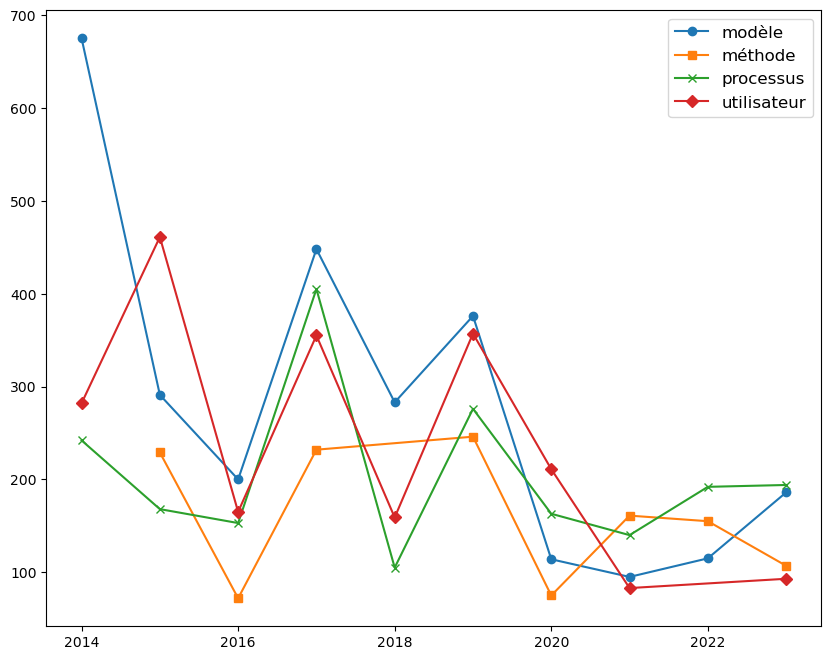

In [63]:
plt.figure(figsize=(10,8))
i = 0
for key, grp_df in dfvim.sort_values(by=['year']).groupby(['word']):
    #ax = grp.plot(ax=ax, kind='line', x='year', y='count', label=key)
    plt.plot(grp_df['year'], grp_df['count'], label=key, marker=markers[i])
    i+=1
    
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.show()

même chose avec les n-grams.

In [64]:
ngramcount.sort_values('n-grams').groupby(by='n-grams').sum().describe()

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/3298733646.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ngramcount.sort_values('n-grams').groupby(by='n-grams').sum().describe()


count          year
count  399.000000    399.000000
mean    27.834586   2529.448622
std     39.450468   1986.592763
min     10.000000   2014.000000
25%     15.000000   2016.000000
50%     18.000000   2019.000000
75%     26.500000   2022.000000
max    518.000000  20185.000000

In [65]:
ving = ["('fouille', 'processus')", "('process', 'mining')", "('van', 'der')",
       "('famille', 'methodes')"] 
markers = ['o', 's', 'x', 'D', 'p', 'v', 'H', '1']

print (ving)
dfving = ngramcount [ ngramcount['n-grams'].isin(ving)]
dfving

["('fouille', 'processus')", "('process', 'mining')", "('van', 'der')", "('famille', 'methodes')"]


n-grams  count  \
253     ('process', 'mining')     53   
256            ('van', 'der')     44   
455  ('fouille', 'processus')     34   
466     ('process', 'mining')     19   
478            ('van', 'der')     15   

                                              source  year  
253  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
256  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
455  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
466  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
478  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023

In [66]:
dfving.drop(columns=['year']).groupby(by=['n-grams']).sum()

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2001267308.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfving.drop(columns=['year']).groupby(by=['n-grams']).sum()


count
n-grams                        
('fouille', 'processus')     34
('process', 'mining')        72
('van', 'der')               59

In [67]:
dfving.drop(columns=['year'])['count'].sum()

165

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2367553123.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp_df in dfving.sort_values(by=['year']).groupby(['n-grams']):


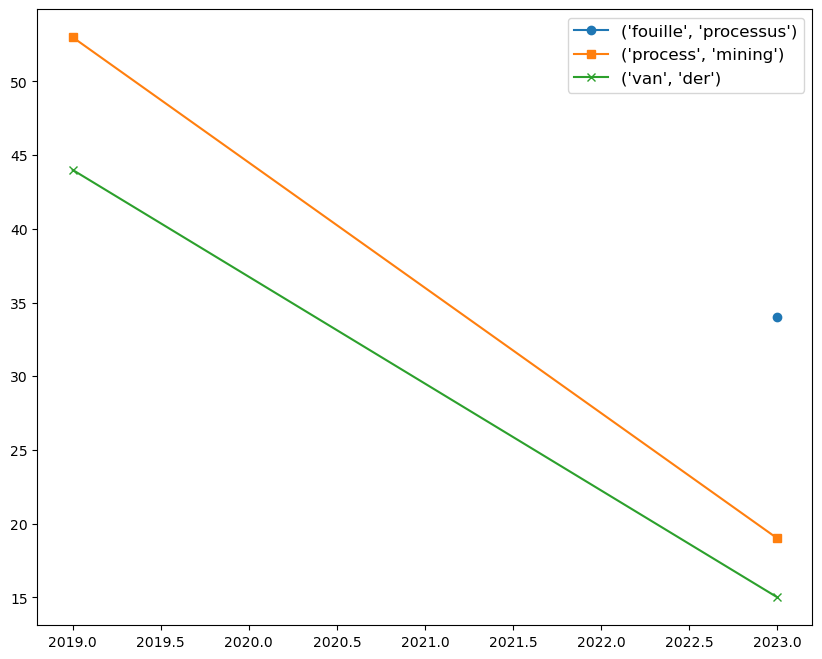

In [68]:
plt.figure(figsize=(10,8))
i = 0
for key, grp_df in dfving.sort_values(by=['year']).groupby(['n-grams']):
    #ax = grp.plot(ax=ax, kind='line', x='year', y='count', label=key)
    plt.plot(grp_df['year'], grp_df['count'], label=key, marker=markers[i])
    i+=1
    
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.show()


In [69]:
ving = ["('processus', 'métier')", "('modèle', 'processus')", "('processus', 'conduite')",
       "('process', 'model')", "('business', 'process')"] 
markers = ['o', 's', 'x', 'D', 'p', 'v', 'H', '1']

print (ving)
dfving = ngramcount [ ngramcount['n-grams'].isin(ving)]
dfving

["('processus', 'métier')", "('modèle', 'processus')", "('processus', 'conduite')", "('process', 'model')", "('business', 'process')"]


n-grams  count  \
350    ('processus', 'métier')     81   
401    ('processus', 'métier')     55   
154    ('processus', 'métier')     37   
456    ('modèle', 'processus')     32   
12     ('modèle', 'processus')     29   
158  ('processus', 'conduite')     28   
263    ('modèle', 'processus')     27   
73     ('processus', 'métier')     24   
273       ('process', 'model')     21   
164    ('modèle', 'processus')     20   
314    ('processus', 'métier')     19   
116    ('processus', 'métier')     19   
361    ('business', 'process')     17   
178       ('process', 'model')     17   
133    ('modèle', 'processus')     15   
241    ('processus', 'métier')     13   
441    ('business', 'process')     12   

                                              source  year  
350  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
401  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022  
154  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017  
456  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
12   ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014  
158  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017  
263  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
73   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
273  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
164  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017  
314  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf  2020  
116  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf  2016  
361  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
178  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017  
133  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf  2016  
241  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018  
441  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022

In [70]:
print (dfving.drop(columns=['year'])['count'].sum())
dfving.drop(columns=['year']).groupby(by=['n-grams']).sum()

466


/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/1343903737.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfving.drop(columns=['year']).groupby(by=['n-grams']).sum()


count
n-grams                         
('business', 'process')       29
('modèle', 'processus')      123
('process', 'model')          38
('processus', 'conduite')     28
('processus', 'métier')      248

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2453828788.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp_df in dfving.sort_values(by=['year']).groupby(['n-grams']):


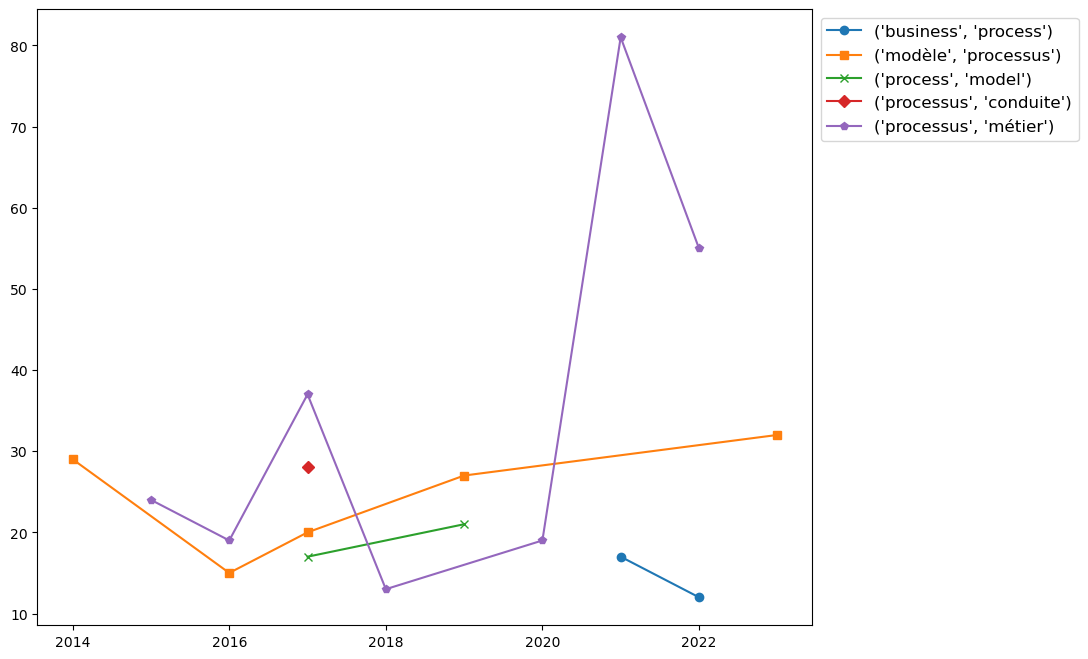

In [71]:
plt.figure(figsize=(10,8))
i = 0
for key, grp_df in dfving.sort_values(by=['year']).groupby(['n-grams']):
    #ax = grp.plot(ax=ax, kind='line', x='year', y='count', label=key)
    plt.plot(grp_df['year'], grp_df['count'], label=key, marker=markers[i])
    i+=1
    
plt.legend( bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.show()

# Suite après commentaires 

Suite aux commentaires des reviewers d'Inforsid 2024, on essaie quelques analyses supplémentaires. Tout d'abord, on va commencer par regarder les mots les moins cités pour voir si des technologies en particulier s'y cacheraient. On voit des termes comme "bert", "transformer", et "machine learning" apparaitre. 

In [78]:
ngramplusfreq.query('count < {}'.format(bquartinf)).tail(50)

count
n-grams                                
('exigence', 'modélisation')         13
('sbp', 'concept')                   13
('gouvernance', 'projet')            13
('édition', 'grenobl')               12
('business', 'processe')             12
('étape', 'cycle')                   12
('caractère', 'personnel')           12
('évaluation', 'risque')             12
('modèle', 'bert')                   12
('relation', 'topologique')          12
('service', 'covoiturage')           12
('conceptual', 'schema')             12
('processus', 'affaire')             12
('exigence', 'sécurité')             12
('exigence', 'spatio')               12
('logiciel', 'claroline')            12
('nosql', 'graphe')                  12
('gestionnaire', 'ressource')        12
('méthode', 'évaluation')            12
('donnée', 'caractère')              12
('dimension', 'temporel')            12
('menace', 'intérieure')             12
('music', 'score')                   12
('système', 'stockage')              12
('connaissance', 'domaine')          12
('gestion', 'risque')                12
('machine', 'learning')              11
('panneau', 'numérique')             11
('agile', 'développeur')             11
('pari', 'france')                   11
('mise', 'jour')                     11
('composante', 'sin')                11
('vie', 'processus')                 11
('sensible', 'contexte')             11
('trajectoire', 'échelle')           11
('proximity', 'tracing')             11
('enjeu', 'numérique')               11
('design', 'thinking')               11
('donnée', 'graphe')                 11
('vie', 'intelligent')               11
('systématique', 'littérature')      10
('dataset', 'idf')                   10
('idf', 'dataset')                   10
('donnée', 'issu')                   10
('architecture', 'transformer')      10
('jeu', 'test')                      10
('partitionnement', 'classique')     10
('partitionnement', 'dynamique')     10
('premier', 'temps')                 10
('end', 'end')                       10

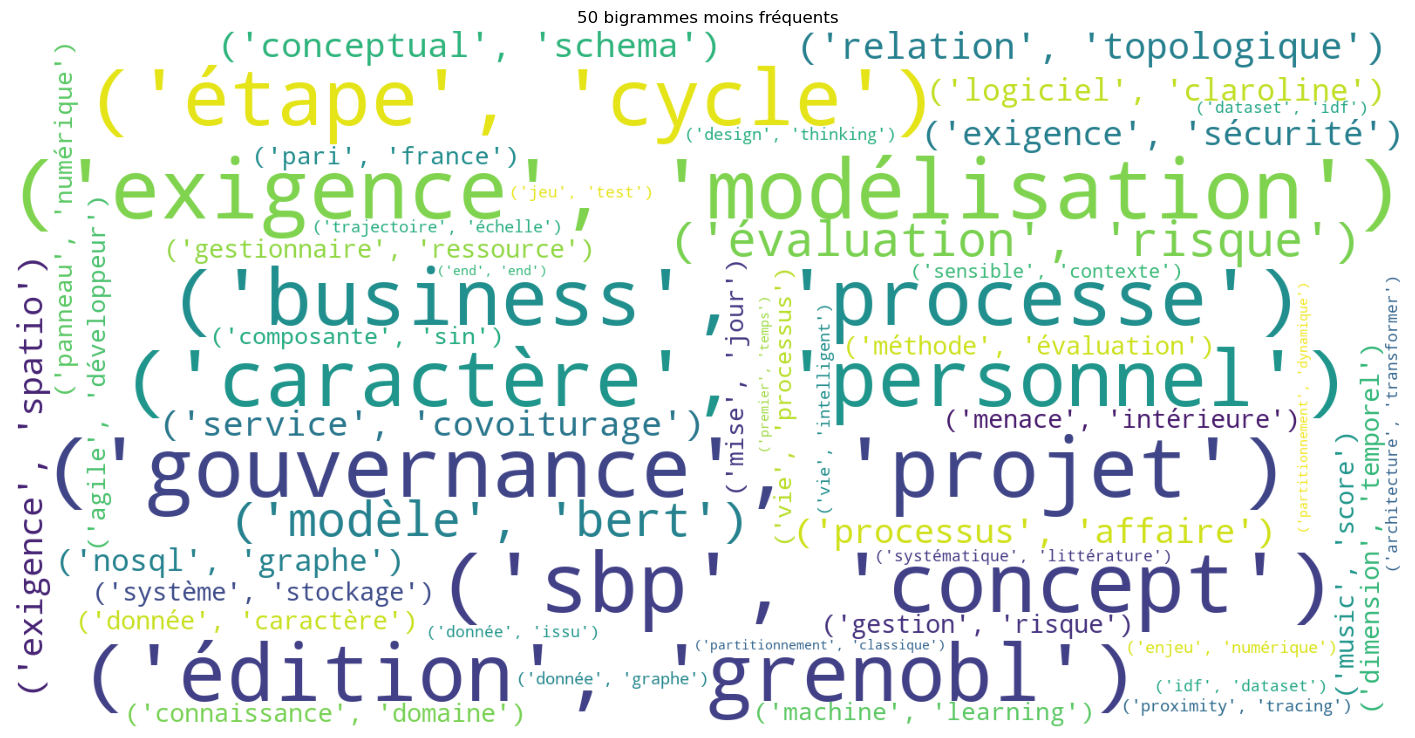

In [112]:
lastbigr = ngramplusfreq.query('count < {}'.format(bquartinf)).tail(50).to_dict()['count']  
#lastbigr
wc = WordCloud( width=1600, height=800, max_words=len(lastbigr), background_color="white").generate_from_frequencies(lastbigr)
plt.figure(figsize=(18,10)) #, dpi=1200)
plt.title('50 bigrammes moins fréquents')
plt.axis('off')
plt.imshow(wc)

On a choisi des bigrammes et des mots à partir des thèmes récurrents des sections.  

In [82]:
bigsections = ["('web', 'sémantique')", "('réseau', 'social')", "('ingénierie', 'modèle')",
       "('ingénierie', 'exigence')", "('système', 'recommandation')",
       "('processus', 'métier')", "('modèle', 'processus')" ] 
markers = ['o', 's', 'x', 'D', 'p', 'v', 'H', '1', '*']

print (bigsections)
dfbigsections= ngramcount [ ngramcount['n-grams'].isin(bigsections)]
dfbigsections

["('web', 'sémantique')", "('réseau', 'social')", "('ingénierie', 'modèle')", "('ingénierie', 'exigence')", "('système', 'recommandation')", "('processus', 'métier')", "('modèle', 'processus')"]


n-grams  count  \
50            ('réseau', 'social')     83   
350        ('processus', 'métier')     81   
401        ('processus', 'métier')     55   
102           ('réseau', 'social')     45   
205  ('système', 'recommandation')     37   
154        ('processus', 'métier')     37   
456        ('modèle', 'processus')     32   
63      ('ingénierie', 'exigence')     30   
12         ('modèle', 'processus')     29   
263        ('modèle', 'processus')     27   
305           ('réseau', 'social')     25   
266  ('système', 'recommandation')     24   
73         ('processus', 'métier')     24   
358           ('réseau', 'social')     20   
164        ('modèle', 'processus')     20   
314        ('processus', 'métier')     19   
216           ('réseau', 'social')     19   
116        ('processus', 'métier')     19   
33        ('ingénierie', 'modèle')     19   
92           ('web', 'sémantique')     18   
476           ('réseau', 'social')     15   
133        ('modèle', 'processus')     15   
431     ('ingénierie', 'exigence')     14   
241        ('processus', 'métier')     13   

                                              source  year  
50   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
350  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
401  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022  
102  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf  2016  
205  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018  
154  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017  
456  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
63   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
12   ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014  
263  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
305  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf  2020  
266  ../Inforsid/InforSID2019/Actes_INFORSID2019.pdf  2019  
73   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
358  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf  2021  
164  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf  2017  
314  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf  2020  
216  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018  
116  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf  2016  
33   ../Inforsid/InforSID2014/Actes_INFORSID2014.pdf  2014  
92   ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf  2015  
476  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf  2023  
133  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf  2016  
431  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf  2022  
241  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf  2018

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2965144344.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp_df in dfbigsections.sort_values(by=['year']).groupby(['n-grams']):


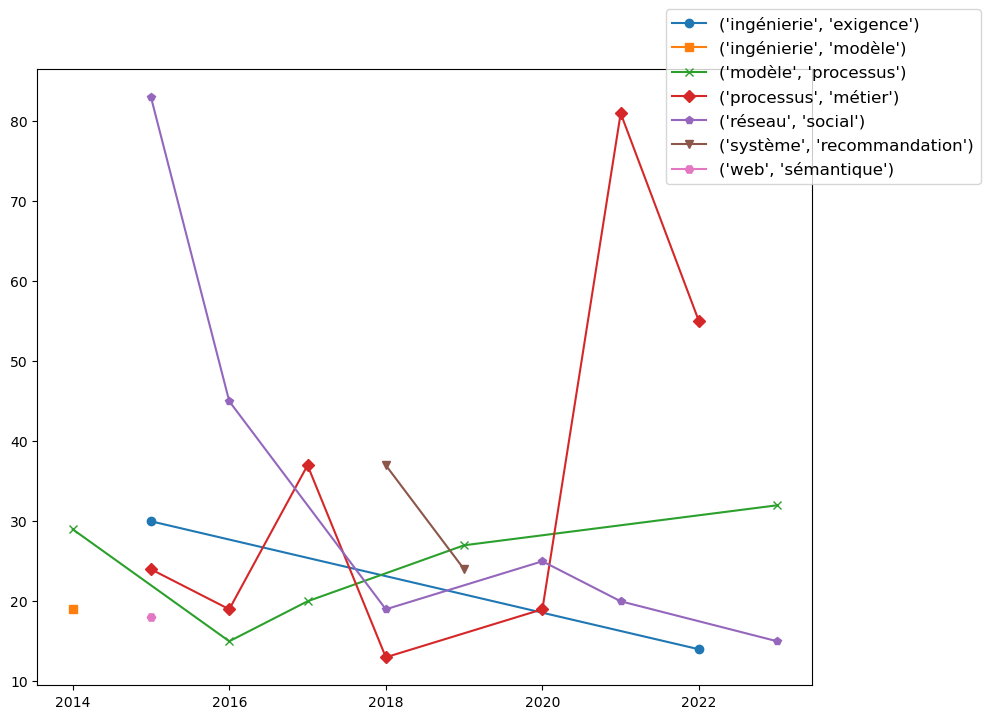

In [92]:
plt.figure(figsize=(10,8))
i = 0
for key, grp_df in dfbigsections.sort_values(by=['year']).groupby(['n-grams']):
    #ax = grp.plot(ax=ax, kind='line', x='year', y='count', label=key)
    plt.plot(grp_df['year'], grp_df['count'], label=key, marker=markers[i])
    i+=1
    
plt.legend( bbox_to_anchor=(0.8, 0.8), fontsize=12)
plt.show()

On essaie avec les sections

In [97]:
motssections = ['web', 'sémantique', 'connaissance', 'ontologie',
       'exigence', 'sécurité', 'décision', 'entreprise','organisation' ] 
  #     'méthode', 'modèle', 'processus', 
markers = ['o', 's', 'x', 'D', 'p', 'v', 'H', '1', '*', '+' , 'X' ]

print (motssections)
dfsections= wordcount [ wordcount['word'].isin(motssections)]
dfsections

['web', 'sémantique', 'connaissance', 'ontologie', 'exigence', 'sécurité', 'décision', 'entreprise', 'organisation']


word  count                                           source  \
303  connaissance    202  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf   
165  connaissance    161  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf   
455  connaissance    151  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf   
70      ontologie    140  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf   
180  organisation    131  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf   
81       exigence    116  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf   
87   connaissance    112  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf   
465      sécurité    110  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf   
419      exigence    107  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf   
196      décision    106  ../Inforsid/InforSID2017/Actes_INFORSID2017.pdf   
420    entreprise    105  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf   
115      exigence    102  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf   
96     entreprise    102  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf   
468     ontologie    100  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf   
97   organisation    100  ../Inforsid/InforSID2015/Actes_INFORSID2015.pdf   
225    sémantique     94  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf   
227    entreprise     93  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf   
124      décision     89  ../Inforsid/InforSID2016/Actes_INFORSID2016.pdf   
426  organisation     86  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf   
235     ontologie     86  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf   
433      sécurité     81  ../Inforsid/InforSID2022/Actes_INFORSID2022.pdf   
241      sécurité     81  ../Inforsid/InforSID2018/Actes_INFORSID2018.pdf   
337      décision     79  ../Inforsid/InforSID2020/Actes_INFORSID2020.pdf   
371  organisation     78  ../Inforsid/InforSID2021/Actes_INFORSID2021.pdf   
488    entreprise     73  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf   
490  organisation     66  ../Inforsid/InforSID2023/Actes_INFORSID2023.pdf   

     year  
303  2020  
165  2017  
455  2023  
70   2015  
180  2017  
81   2015  
87   2015  
465  2023  
419  2022  
196  2017  
420  2022  
115  2016  
96   2015  
468  2023  
97   2015  
225  2018  
227  2018  
124  2016  
426  2022  
235  2018  
433  2022  
241  2018  
337  2020  
371  2021  
488  2023  
490  2023

/var/folders/1h/ng0zbjt95vb8g81bk5vsqhkh0000gn/T/ipykernel_45908/2047400311.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp_df in dfsections.sort_values(by=['year']).groupby(['word']):


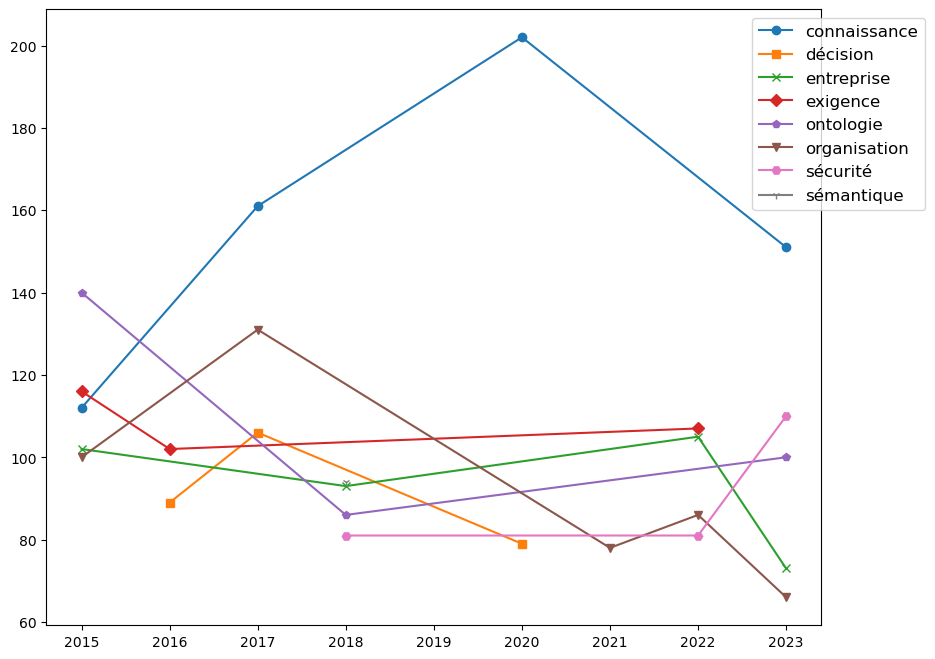

In [98]:
plt.figure(figsize=(10,8))
i = 0
for key, grp_df in dfsections.sort_values(by=['year']).groupby(['word']):
    #ax = grp.plot(ax=ax, kind='line', x='year', y='count', label=key)
    plt.plot(grp_df['year'], grp_df['count'], label=key, marker=markers[i])
    i+=1
    
plt.legend( bbox_to_anchor=(0.9, 1.0), fontsize=12)
plt.show()